# Lesson 4: Visualizing Monetary Policy

**Lesson Objectives**
1. Create functions in separate py files. Save those files in a folder and import the files and their functions from the folder. 
2. Download data from FRED. This includes aligning units so all data uses teh same measures (i.e., billions or millions of dollars)
3. Visualize teh data using line graphs and stacked plots

In [1]:
#plots.py

# os library or module allows you to access commandline functions from python 
# such as making a new directory, changing or navigating between directories, copy files, change file names, etc
import os
import pandas as pd

# numpy is a math data library
import numpy as np

# matplotlib is used for plotting and graphs
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
# s=75 is size of the points in the scatter. 
#Notice that figsize is defined in the function so this is the default size of any figure 
# we create by calling this function
# save_fig false means we won't save the fig in a pp (PDF)    
        
# Create plot for every unique pair of variables, plot_vars is the plot variables or keys of the plot
    plot_vars = list(df.keys())
# cycle through each variable for x value
    for x in plot_vars:
# cycle again for y-value
        for y in plot_vars:
# check to make sure x variable does not equal y variable            
            if x != y:
# notice we already defined a default figsice in the plots function
# so we'll use that default figsice in the subplot                
                fig, ax = plt.subplots(figsize = figsize)
# Create list of years from index Year will be represented by color
# we'll create the year value in the df. Years will be the c value
                if "Year" not in df.keys():
# create list from index, covert each index value to string
# only include first 4 characters which is the year  
# create an integer from those characters                 
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
# assign x & y values, s stands for sice of points which we already defined -
# in the function parameter. c represents color so we want to use the year column
# to color the data                 
                df.plot.scatter(x = x, y = y, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                
# Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                
# Get rid of tick lines perpendicular to both axis for aesthetic
# by setting the length of the tickmarks to cero
                ax.tick_params('both', length=0, which='both')
                
# save image if PdfPages object was passed then try to create a new folder
# if the folder doesn't exist, create it. If it exists, save the fig
                if save_fig:
                    try:                       
                        os.mkdir("plots")
                    except:
                        pass
# identify directory to save figure and save the plots folder then name the file. 
# The first 12 chars of the first var, first 12 chars of the second var, identify the color
# save as .png as well as pdf
                    directory = "plots/" + x[:12] + " " + y[:12] + "c=Year"
# .replace will replace any ":" in the file name with "-"    
                    plt.savefig(directory.replace(":", "-") + ".png")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")

Next we create a function to download data from FRED [Federal Reserve](https://fred.stlouisfed.org/) using pandas datareader.

(https://research.stlouisfed.org/) 

In [2]:
#FRED.py

import pandas as pd
import pandas_datareader.data as web
import datetime

# creating a function that imports data from the federal reserve
# First, we create a dictionary of data codes, so each code is linked to a name
# frequency A = Annual, W = weekly, M = monthly, Q = quarterly, D = daily
# you can also add a number next to the frequency so, Freq = 2D means every 2 days, 3M means very 3 months, etc.
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):

# check if new column is first column of data. if true, then create a new df
    i = 0
        
# dct.items() calls key and value that key points to run through each code, key is column name and val is the code    
    for key, code in data_codes.items():
# check if it's our first column of data        
        if i == 0:
# if it's our first column of data, create a new df
# Create dataframe for first variable, then rename column
# and resample the data by frequency and take the mean so if you sampled the data bi weekly, you'll take the mean or weekly average
# instead of .mean(), you can also use .first() or .last to get just the first sample, or last sample
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
# rename first column so that code is replaced by the key (variable name)            
            df.rename(columns = {code:key}, inplace = True) 

# setting i to None will cause the next block of code to execute,
# placing data within df instead of creating a new dataframe for each variable
            i = None
        else:
            
# If dataframe already exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()

    return df


Now, we'll import teh datlib and use the FRED module to download from FRED. We'll start by gathering data reflecting the monetary base and currency in circulation

In [3]:
# fedProject.py
# from datalib.stats import *
from datlib.plots import *
from datlib.FRED import *

# vars in millions of dollars
data_codes = {"Base: Total": "BOGMBASEW",
             "Base: Currency in Circulation": "MBCURRCIRW"}
start = datetime.datetime(1950,7,1) 
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start,
                  end = end, 
                  freq = "W")
data

Base: Total  Base: Currency in Circulation
DATE                                                  
1975-01-12     108920.0                        78943.0
1975-01-19     107891.0                        78245.0
1975-01-26     107988.0                        77505.0
1975-02-02     106358.0                        76749.0
1975-02-09     106061.0                        76530.0
...                 ...                            ...
2020-08-16    4750981.0                      1999857.0
2020-08-23    4830999.0                      2009260.0
2020-08-30    4830999.0                      2009260.0
2020-09-06    4876690.0                      2022000.0
2020-09-13    4876690.0                      2022000.0

[2384 rows x 2 columns]

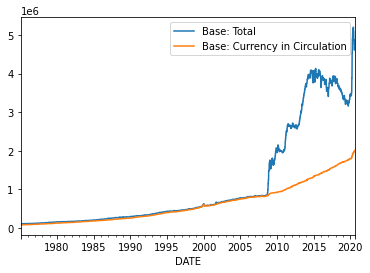

In [4]:
plt.rcParams.update({"font.size":10})
data.plot.line()

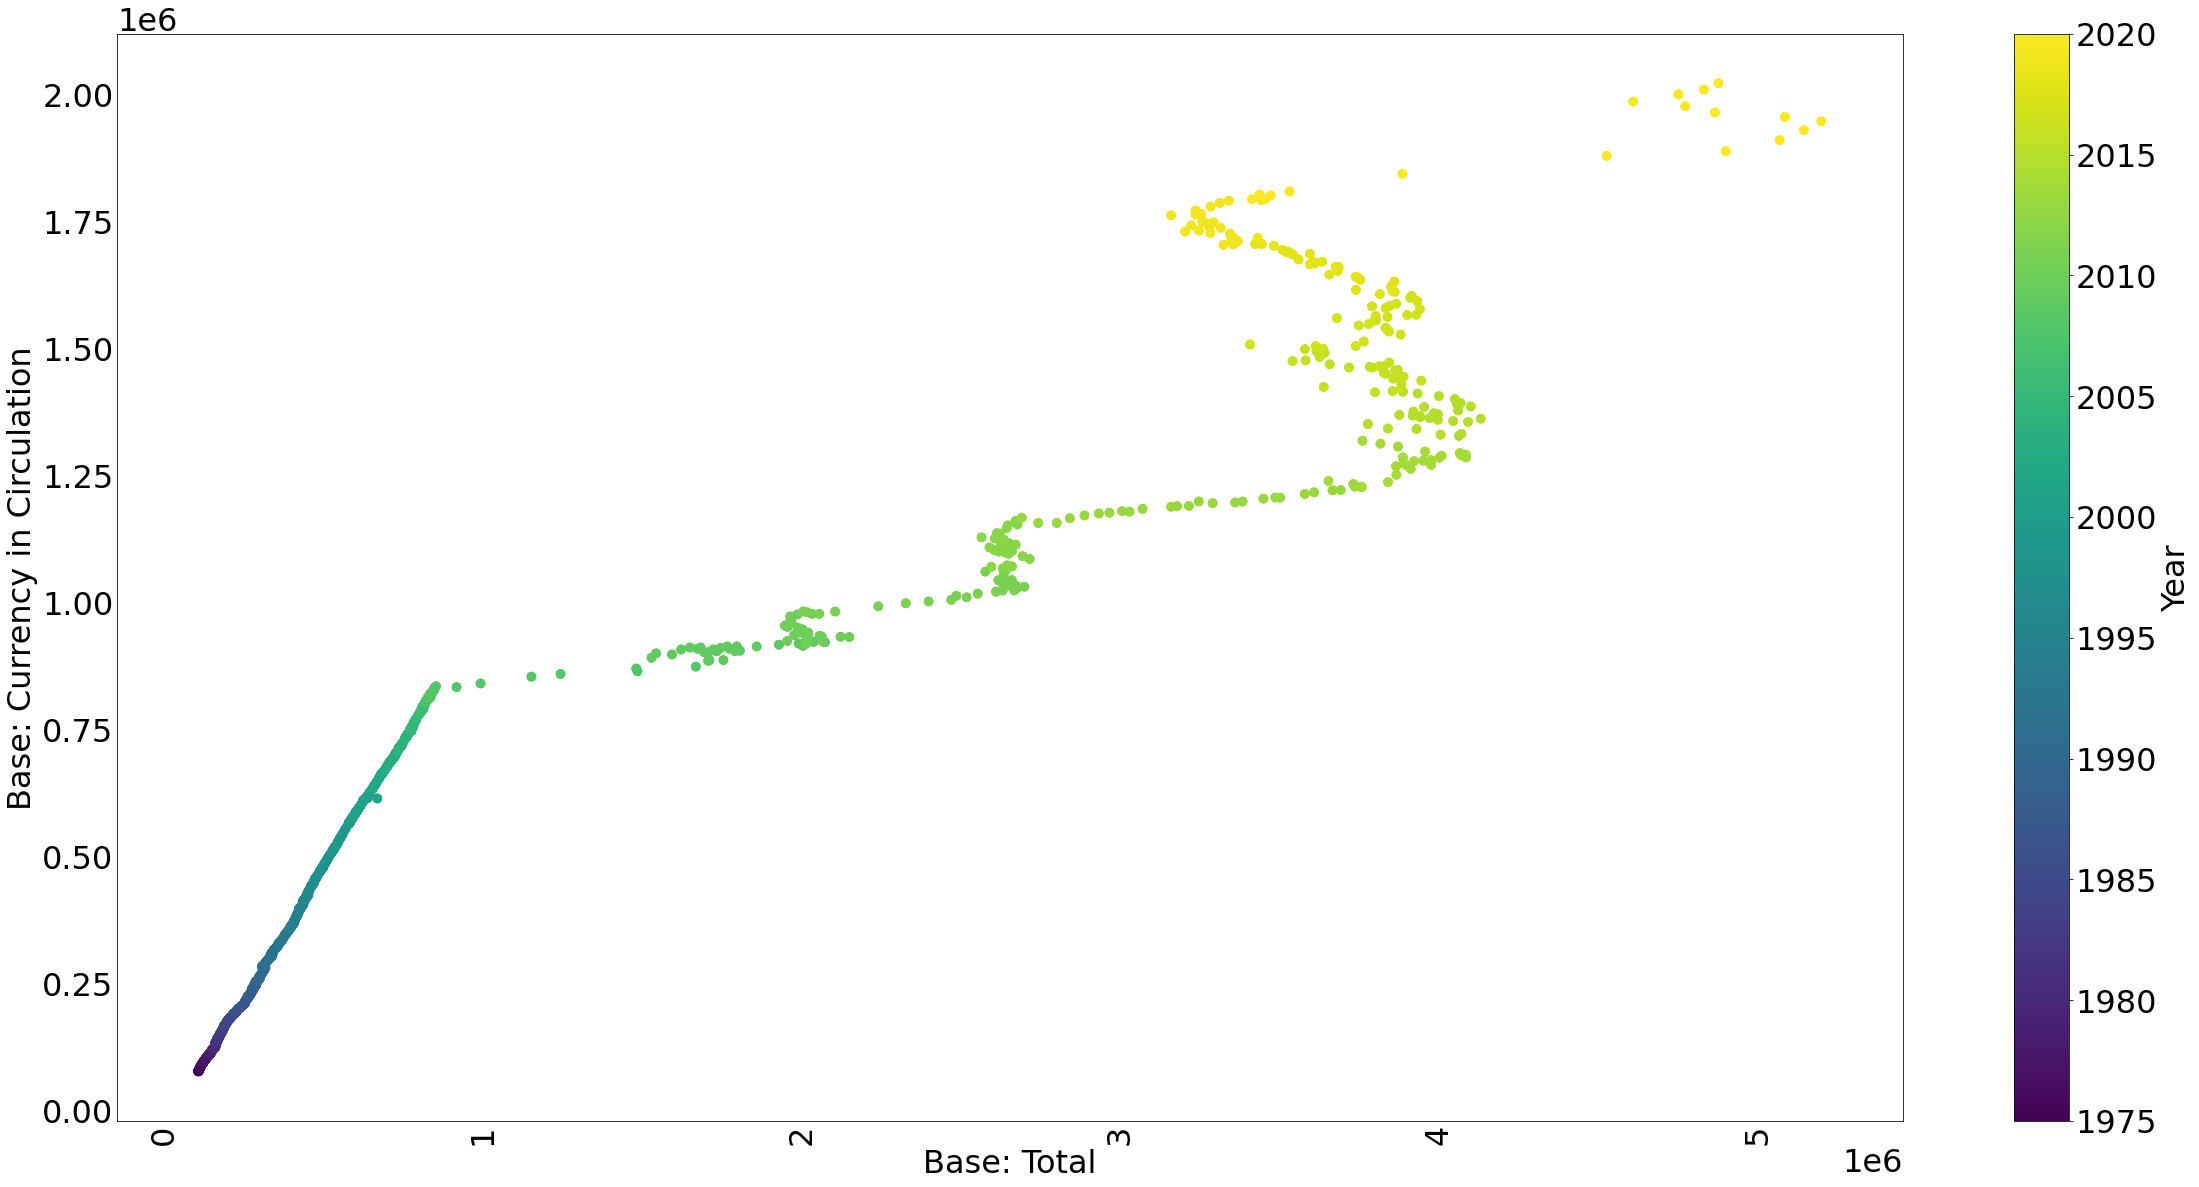

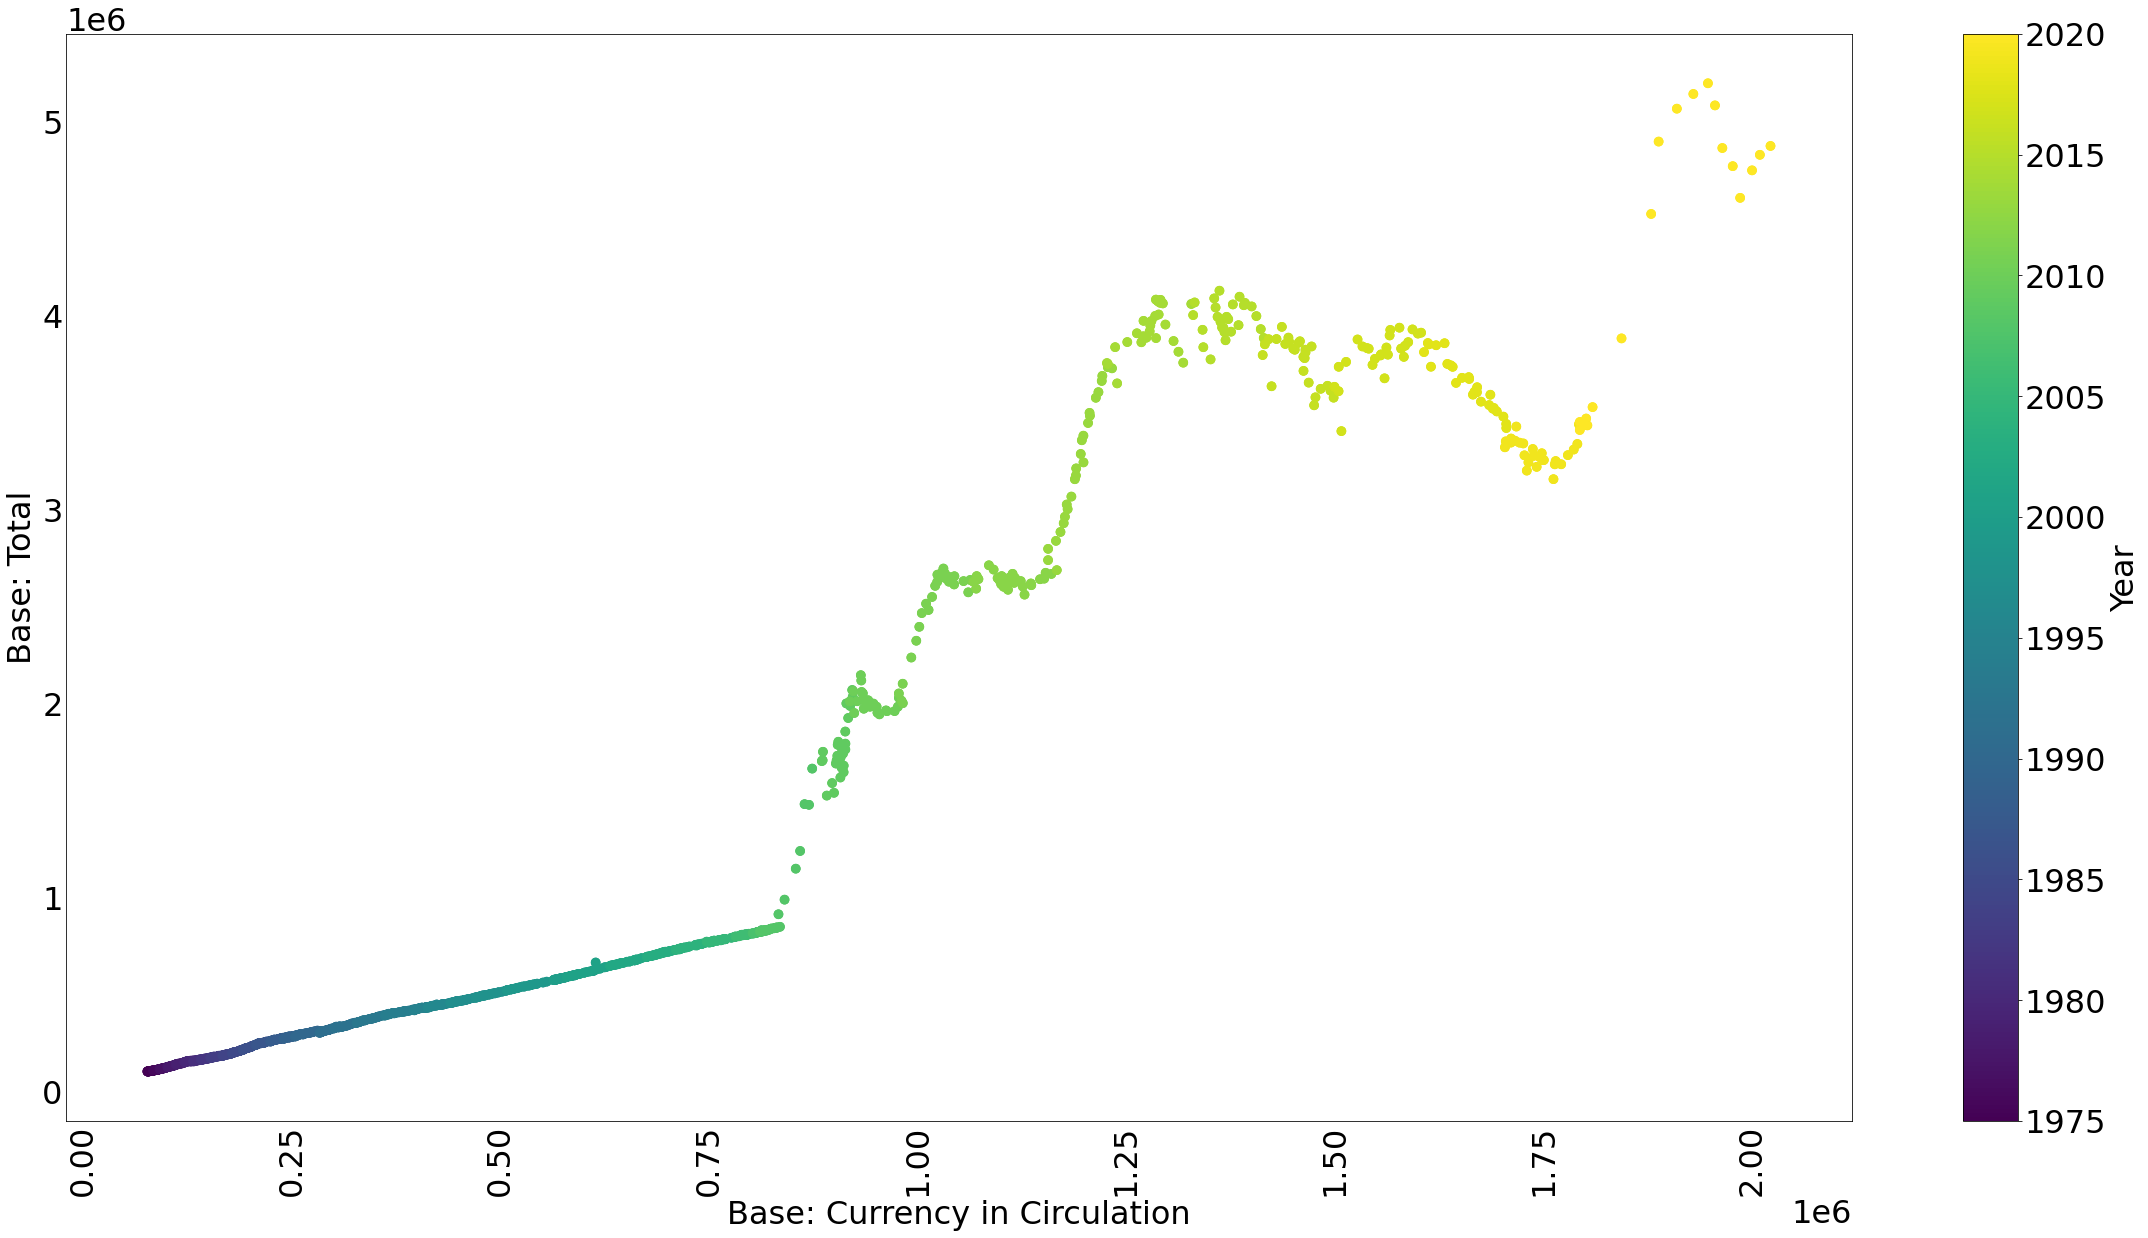

In [5]:
# update default font size to 32
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

## Breaking down the Federal Reserve's Balanc Sheet

The Fed. Reserve is the central bank of the U.S.A. Like all banks, the Fed Reserve has a balance sheet that contains assets and liabilities.

Traditionally, the Fed. Reserve has purchased securities from the U.S. government (aka U.S. Treasuries). The Fed has also tended to issue Fed. Reserve notes (dollar bills) as liabilities. Now, the Fed Reserve offers a variety of deposit accounts that it holds as liabilities. 

In [6]:
# Create a function So, we can pass a column of data to this function to convert the values from billion to million
def bil_to_mil(series):
# to convert, multiply the value in the series by a thousand    
    return series * 10**3

we will use bil_to_mil() function to transform data defined in billions to units of millions

In [7]:
# fedProject.py
#. . .
data_codes = {"Base: Total ($ Mil)": "BOGMBASEW",
              "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
              
              # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
              
              ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
              
              # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",

              # unamortized value of securities held 
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",

              # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
             
              # Reserves 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
              ## Major share of depsotis
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
              
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
              
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
start = datetime.datetime(2002, 12, 1)
end = datetime.datetime.today()

data = gather_data(data_codes, 
                   start = start, 
                   end = end,
                  freq = "M")

In [8]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                 "Balance Sheet: Other Deposits ($ Mil)"]

for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [9]:
data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-12-31            697517.00                              676472.50   
2003-01-31            700446.80                              679511.20   
2003-02-28            700362.25                              679723.75   
2003-03-31            704898.00                              683568.25   
2003-04-30            709173.00                              686919.20   
...                         ...                                    ...   
2020-05-31           5139460.00                             1928941.25   
2020-06-30           5059368.25                             1955540.75   
2020-07-31           4725875.20                             1977793.40   
2020-08-31           4790990.00                             2004558.50   
2020-09-30           4876690.00                             2022000.00   

            Balance Sheet: Total Assets ($ Mil)  \
DATE                                              
2002-12-31                            725800.50   
2003-01-31                            724718.40   
2003-02-28                            721326.00   
2003-03-31                            723651.25   
2003-04-30                            736926.40   
...                                         ...   
2020-05-31                           6947555.25   
2020-06-30                           7127786.25   
2020-07-31                           6960429.40   
2020-08-31                           6975892.25   
2020-09-30                           7048374.20   

            Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)  \
DATE                                                                        
2002-12-31                                          672844.50               
2003-01-31                                          671196.20               
2003-02-28                                          668666.25               
2003-03-31                                          672446.00               
2003-04-30                                          685518.60               
...                                                       ...               
2020-05-31                                         6413832.00               
2020-06-30                                         6582068.00               
2020-07-31                                         6606989.60               
2020-08-31                                         6685136.00               
2020-09-30                                         6802569.00               

            Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2020-05-31                                       5843195.25   
2020-06-30                                       6048567.25   
2020-07-31                                       6188826.40   
2020-08-31                                       6283343.50   
2020-09-30                                       6397502.00   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2020-05-31         

In [10]:
#plots.py

def plot_lines(df, linewidth = 1, figsize = (40,20), 
               legend = True, pp = None):
    fig, ax = plt.subplots(figsize = figsize)
# If no secondary y-axis, plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
# turn the text on teh x-axis so taht it reads vertically
    ax.tick_params(axis ="x", rotation = 90)
# get rid of tick lines
    ax.tick_params("both", length=0, which = "both")
# transform y-axis values from scientific notations to integers
    vals = ax.get_yticks()
    vals = [int(x) for x in vals]
    ax.set_yticklabels(vals)
    
# format image filename by replacing unwanted characters
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename=filename.replace(char, "")
#Save file and also avoid cutting off text
    plt.savefig(filename[:50] + "line.png", 
                bbox_inches = "tight") #avoids cutting off text
    if pp != None: pp.savefig(fig, box_inches = "tight")

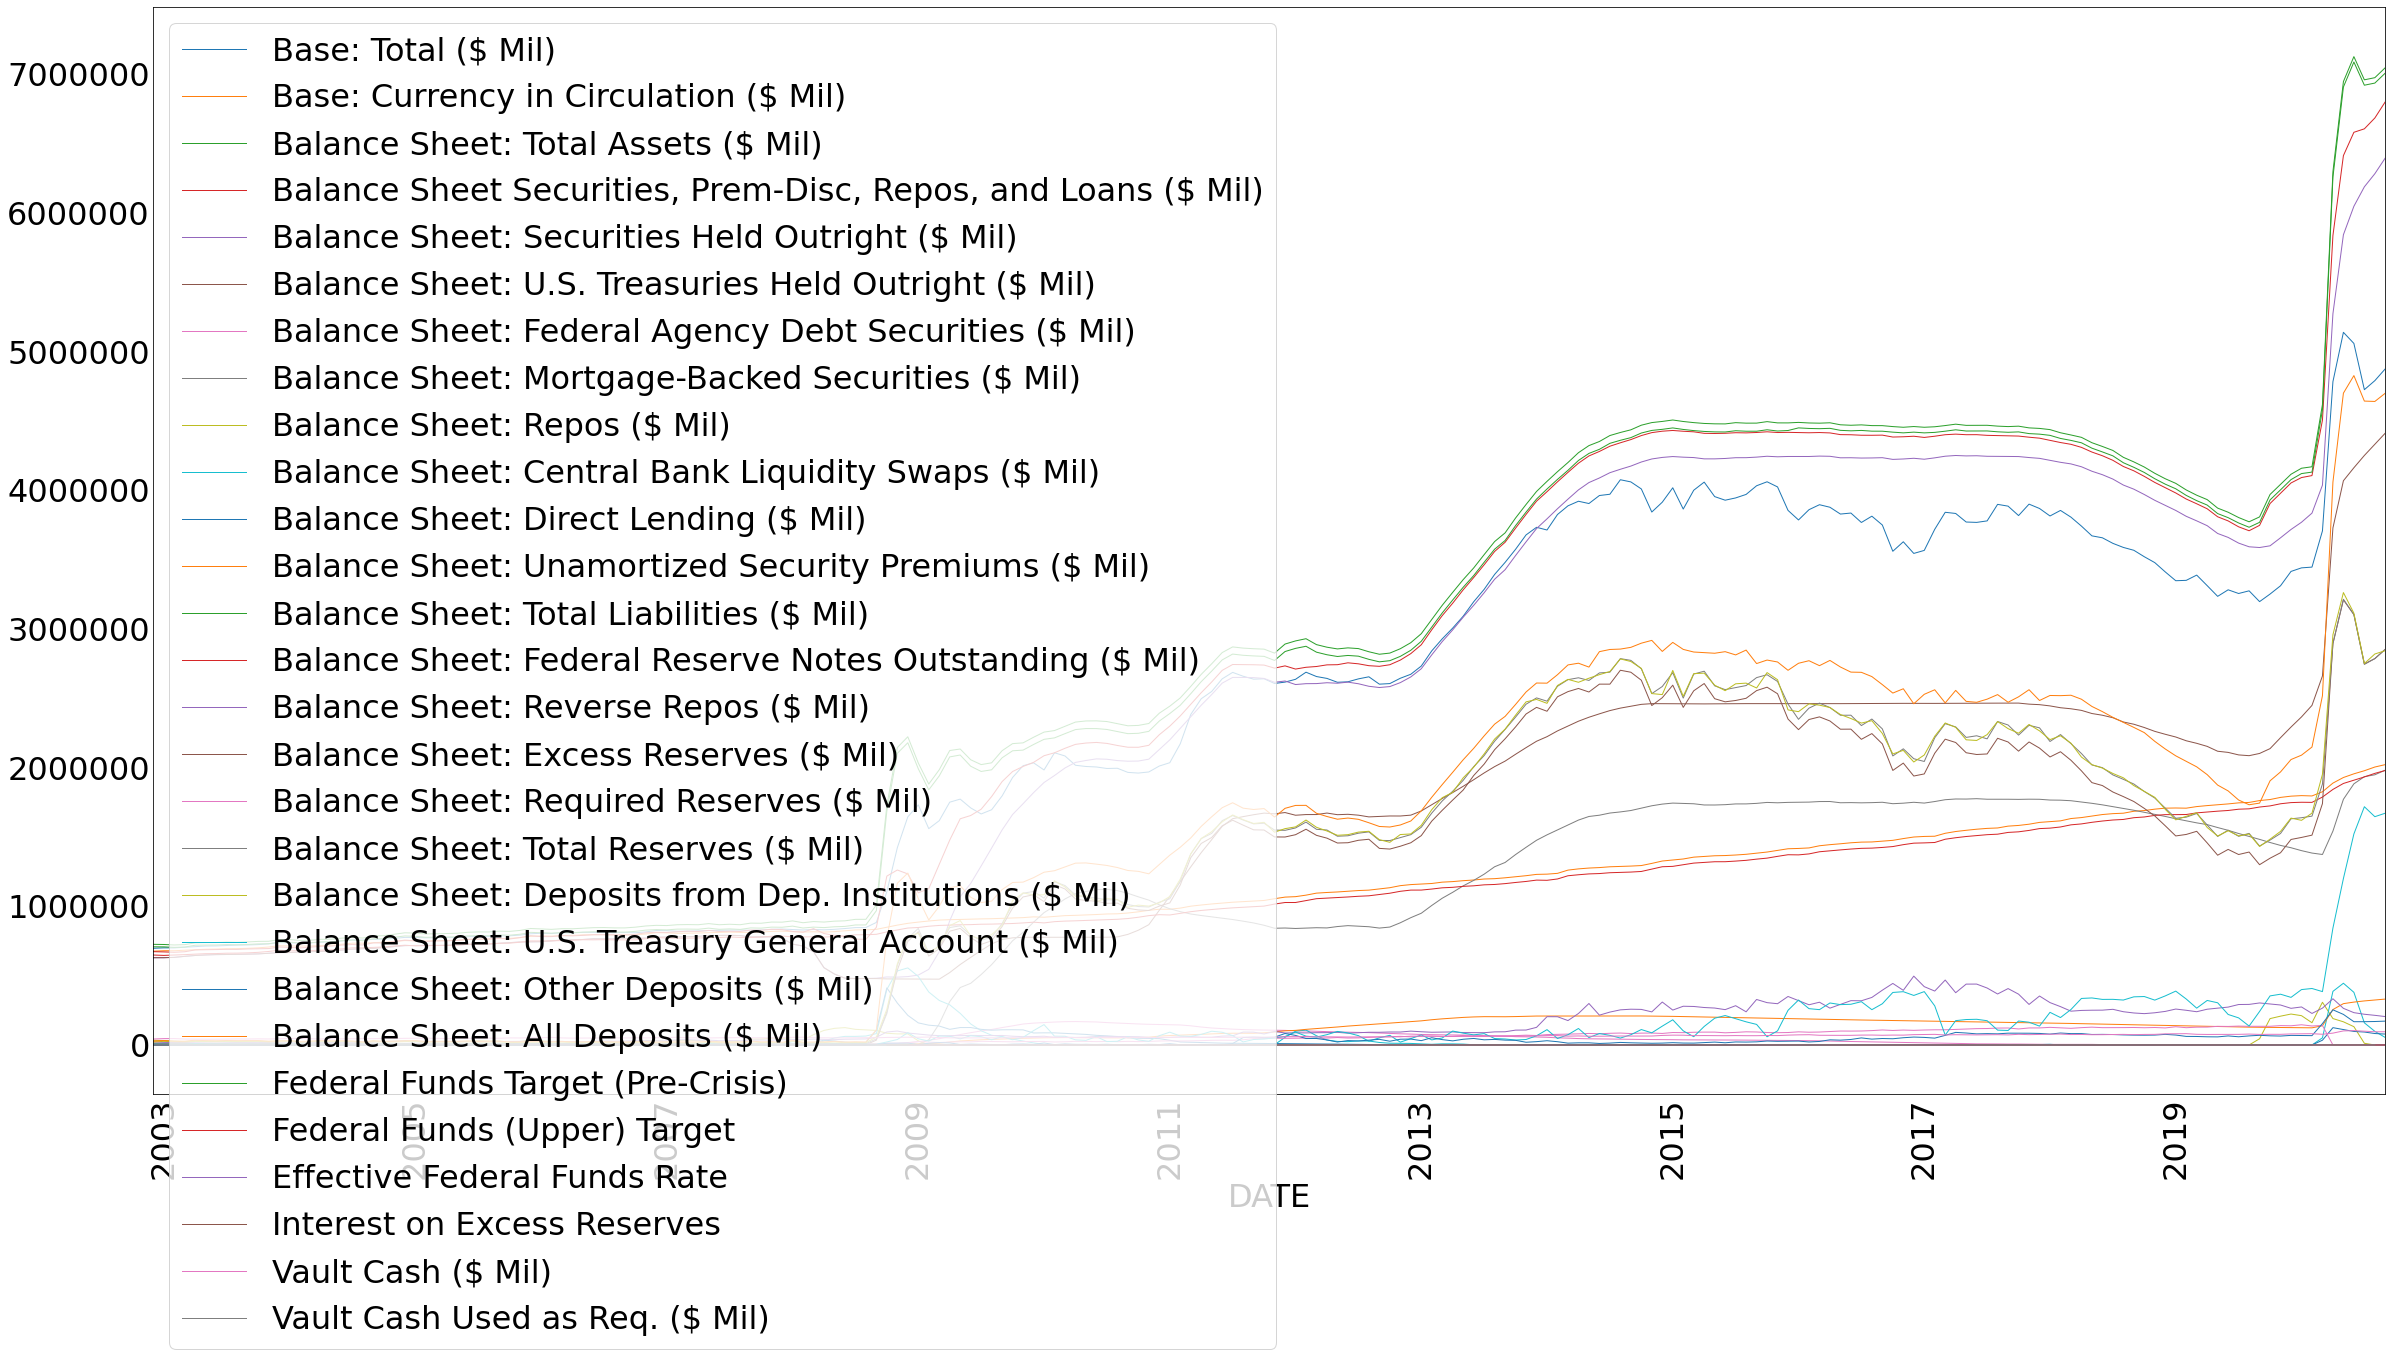

In [11]:
from datlib.plots import *
# fedProject.py
#. . .
plot_lines(df = data, linewidth =1, figsize =(40,20), pp=None, legend = True)

We've plotted all assets and liabilities together in the above graphs. The resulting visualization may not be easy to interpret. Also, there are numerous categories to evaluate. Next, we'll use out plot function to concentrate on only a few variables related to the plot the monetary base

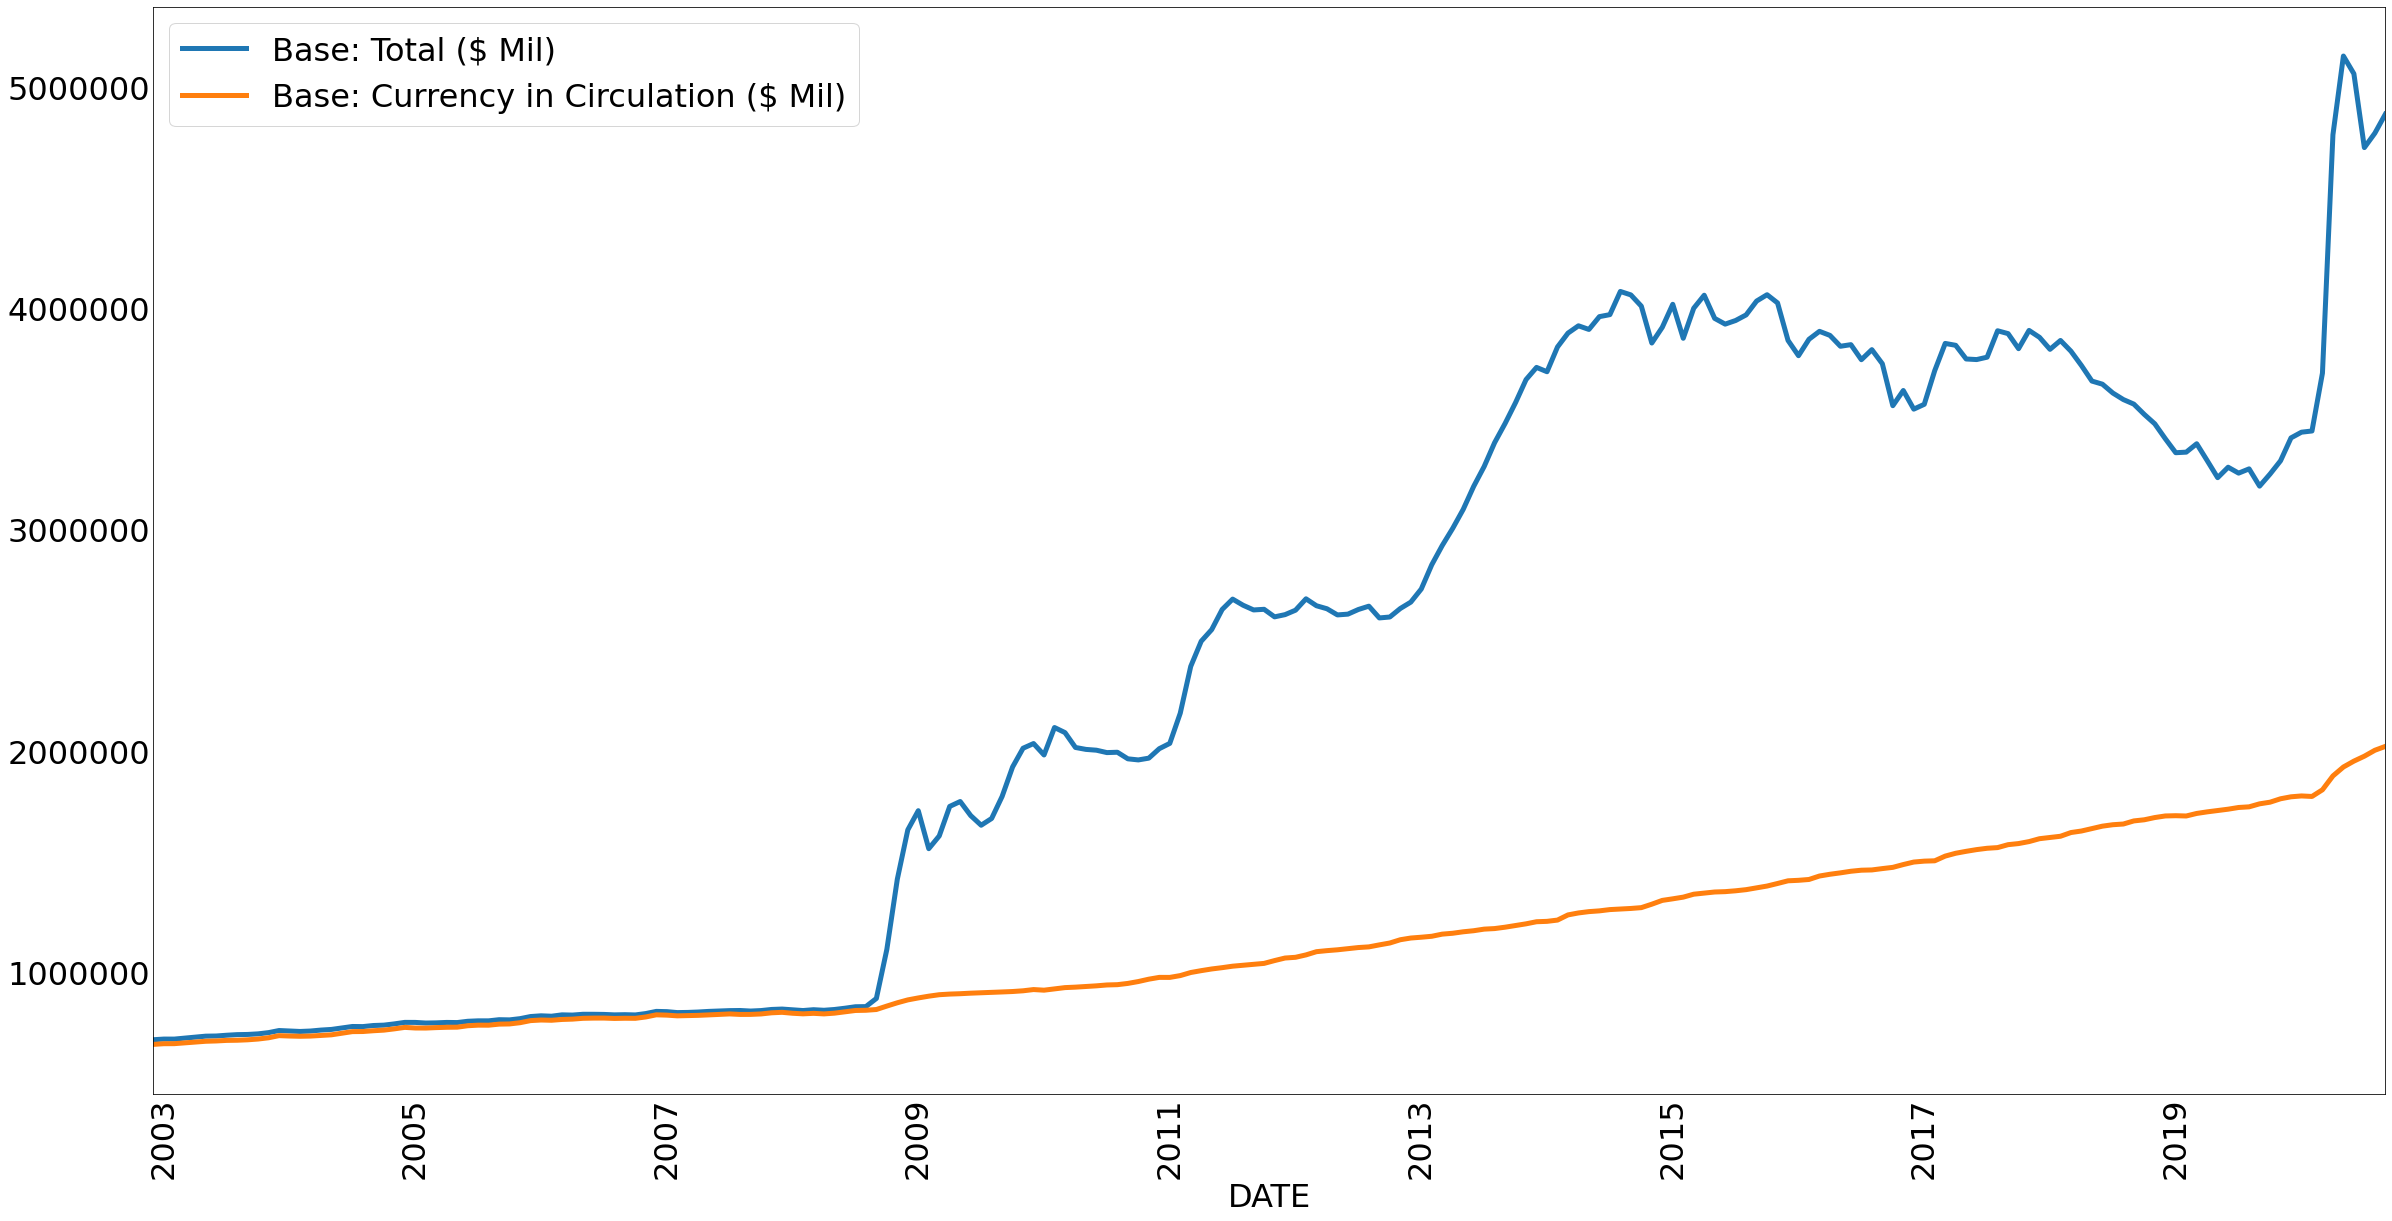

In [12]:
money_vars = ["Base: Total ($ Mil)", 
             "Base: Currency in Circulation ($ Mil)"]

plot_lines(df=data[money_vars], linewidth =5, figsize =(40,20), pp = None)
#data[money_vars]

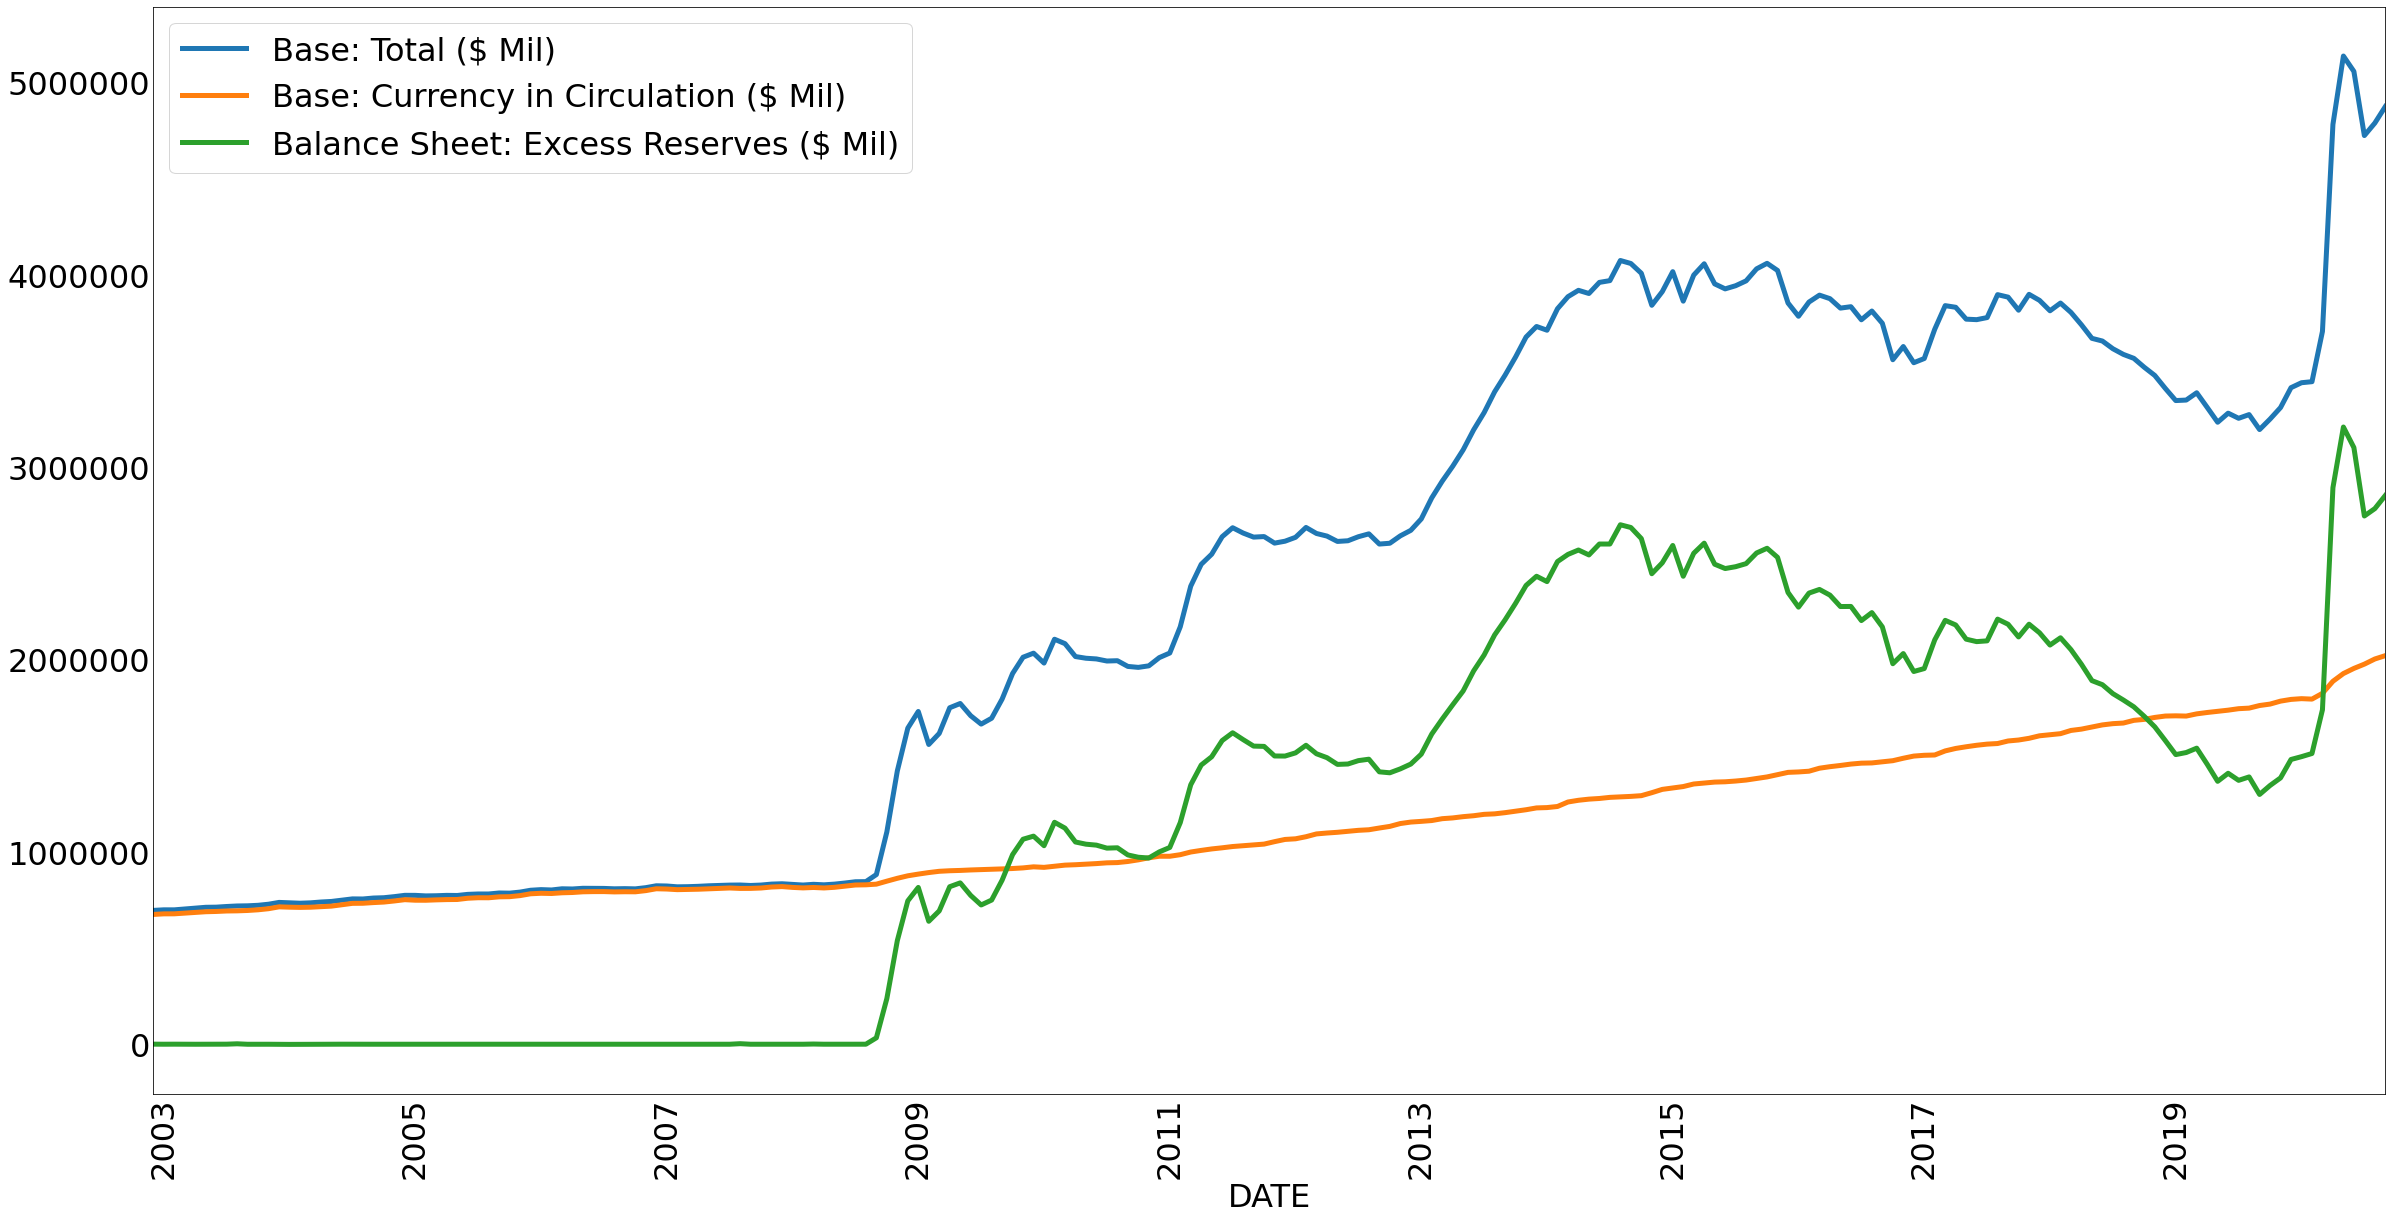

In [13]:
money_vars = ["Base: Total ($ Mil)", 
             "Base: Currency in Circulation ($ Mil)", 
             "Balance Sheet: Excess Reserves ($ Mil)"]

plot_lines(df=data[money_vars], linewidth =5, figsize =(40,20), pp = None)

# Stacked plots

You can create plots that stack the area of lines instead of plotting the line relative to zero on the vertical axis.

In [30]:
# function for stacked lines
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40, 20),
                       pp = None, total_var = False, title = False):
    fig, ax = plt.subplots(figsize = figsize)
    
# df.plot.area() creates a stacked plot    
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth, ax = ax)
    
# change y als from mil to tril   
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, 
                                c = "k", label = total_var, ls="--")
        
 # loc = 2 is the top left column 
 # ncol=2 meeas the legend will have 2 columns of names      
    ax.legend(loc =2, ncol = 2)
    if title != False:
        plt.title(title)

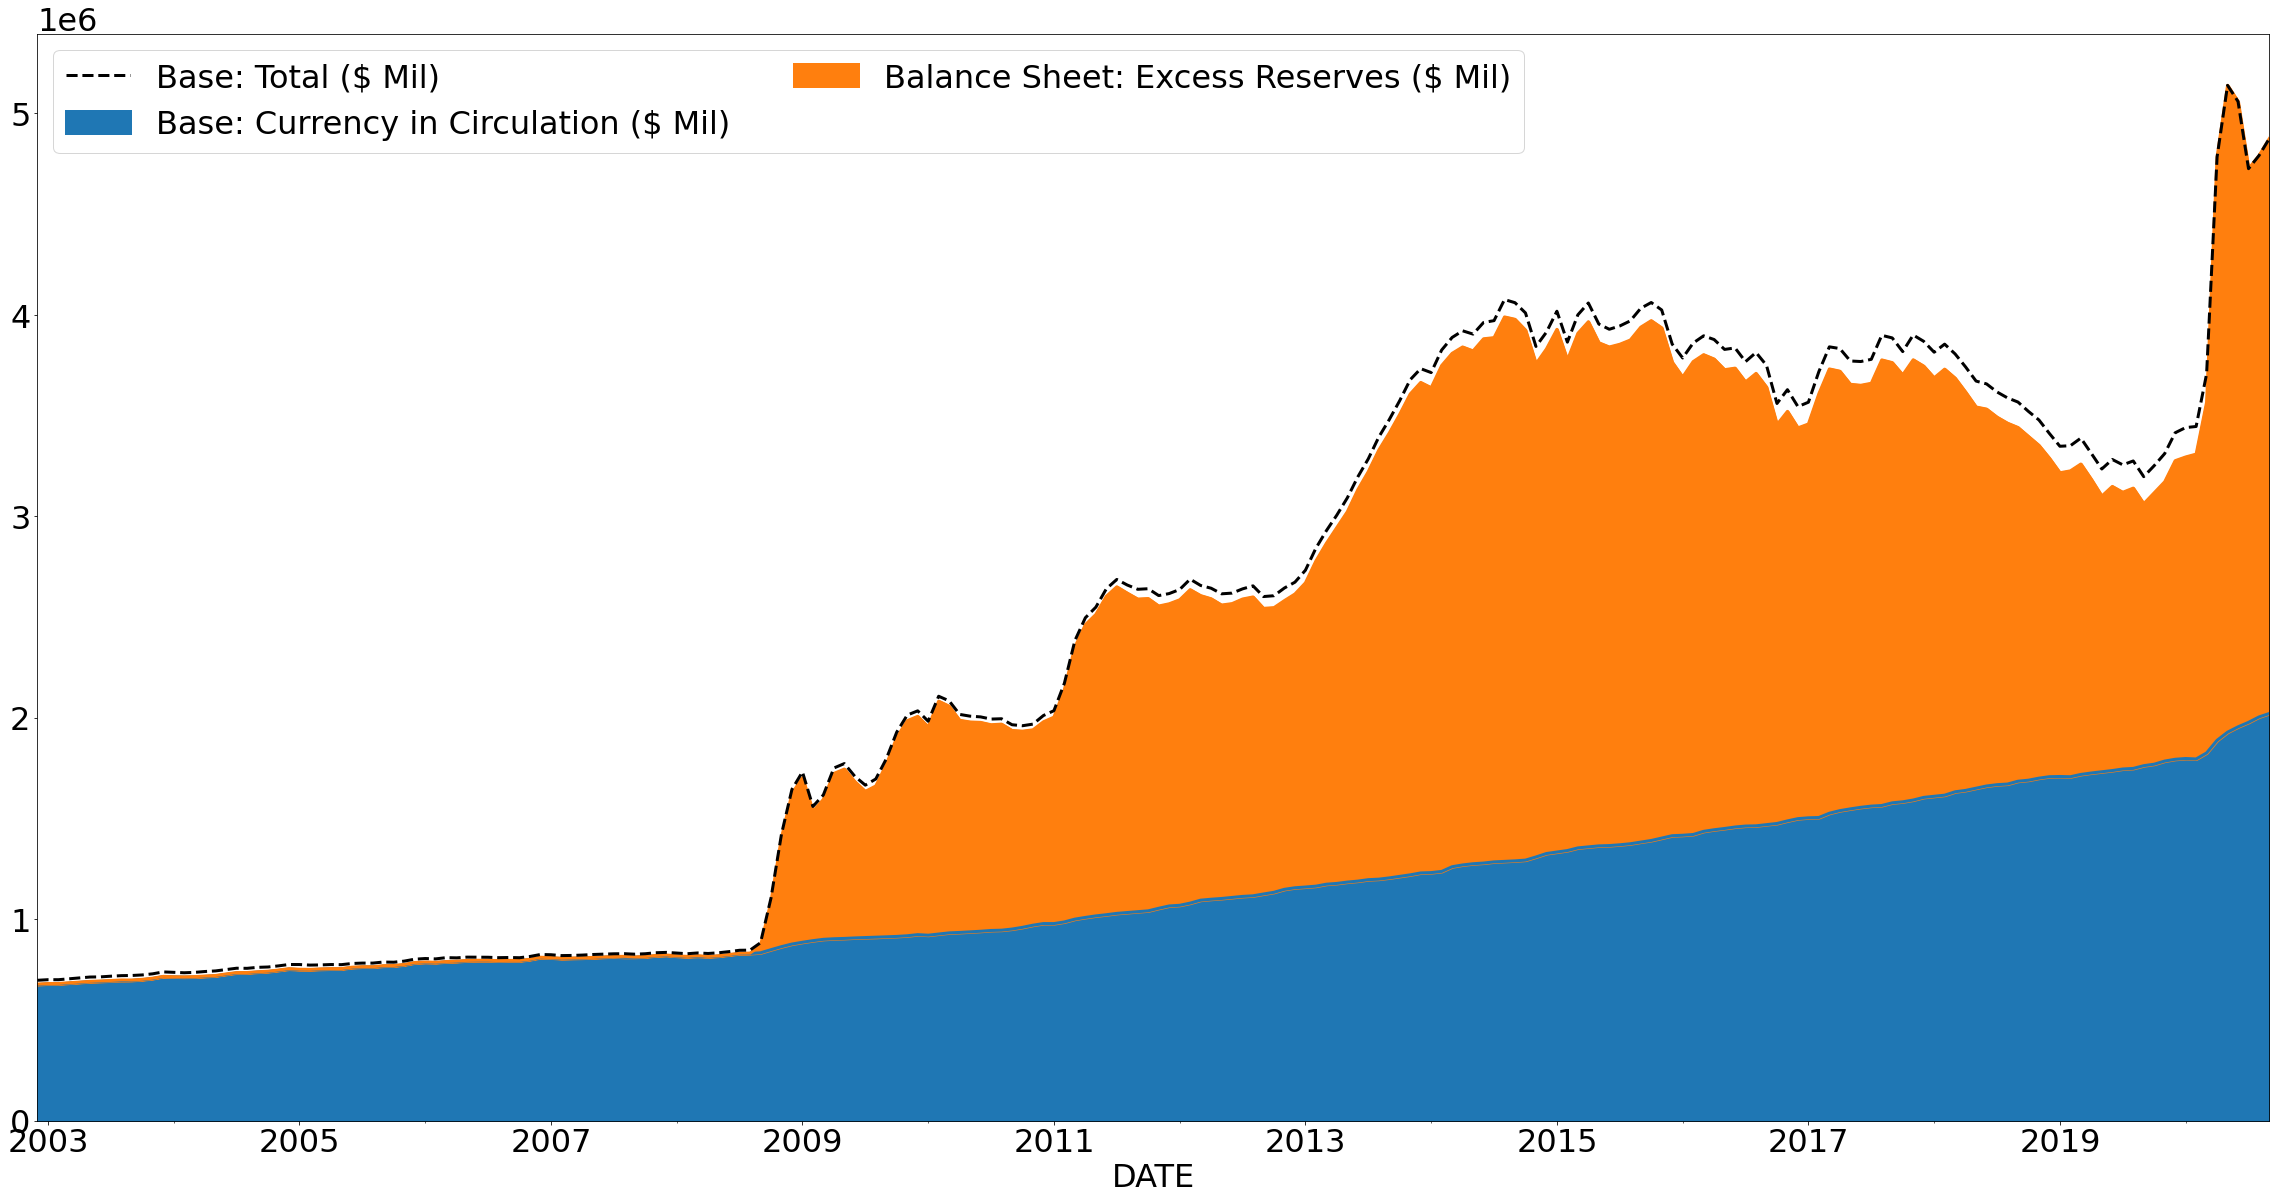

In [15]:
# fedProject
#. . .
# for the stacked plot, money_vars selects the variables whose areas we will plot
money_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

>We can see from the above plot that the monetary base in the United States is largely divided between currency in circulation and excess reserves which do not directly support lending. Missing from this plot is require reserves. These are reserves that banks legally must hold as defined by a fraction of their total lending. 

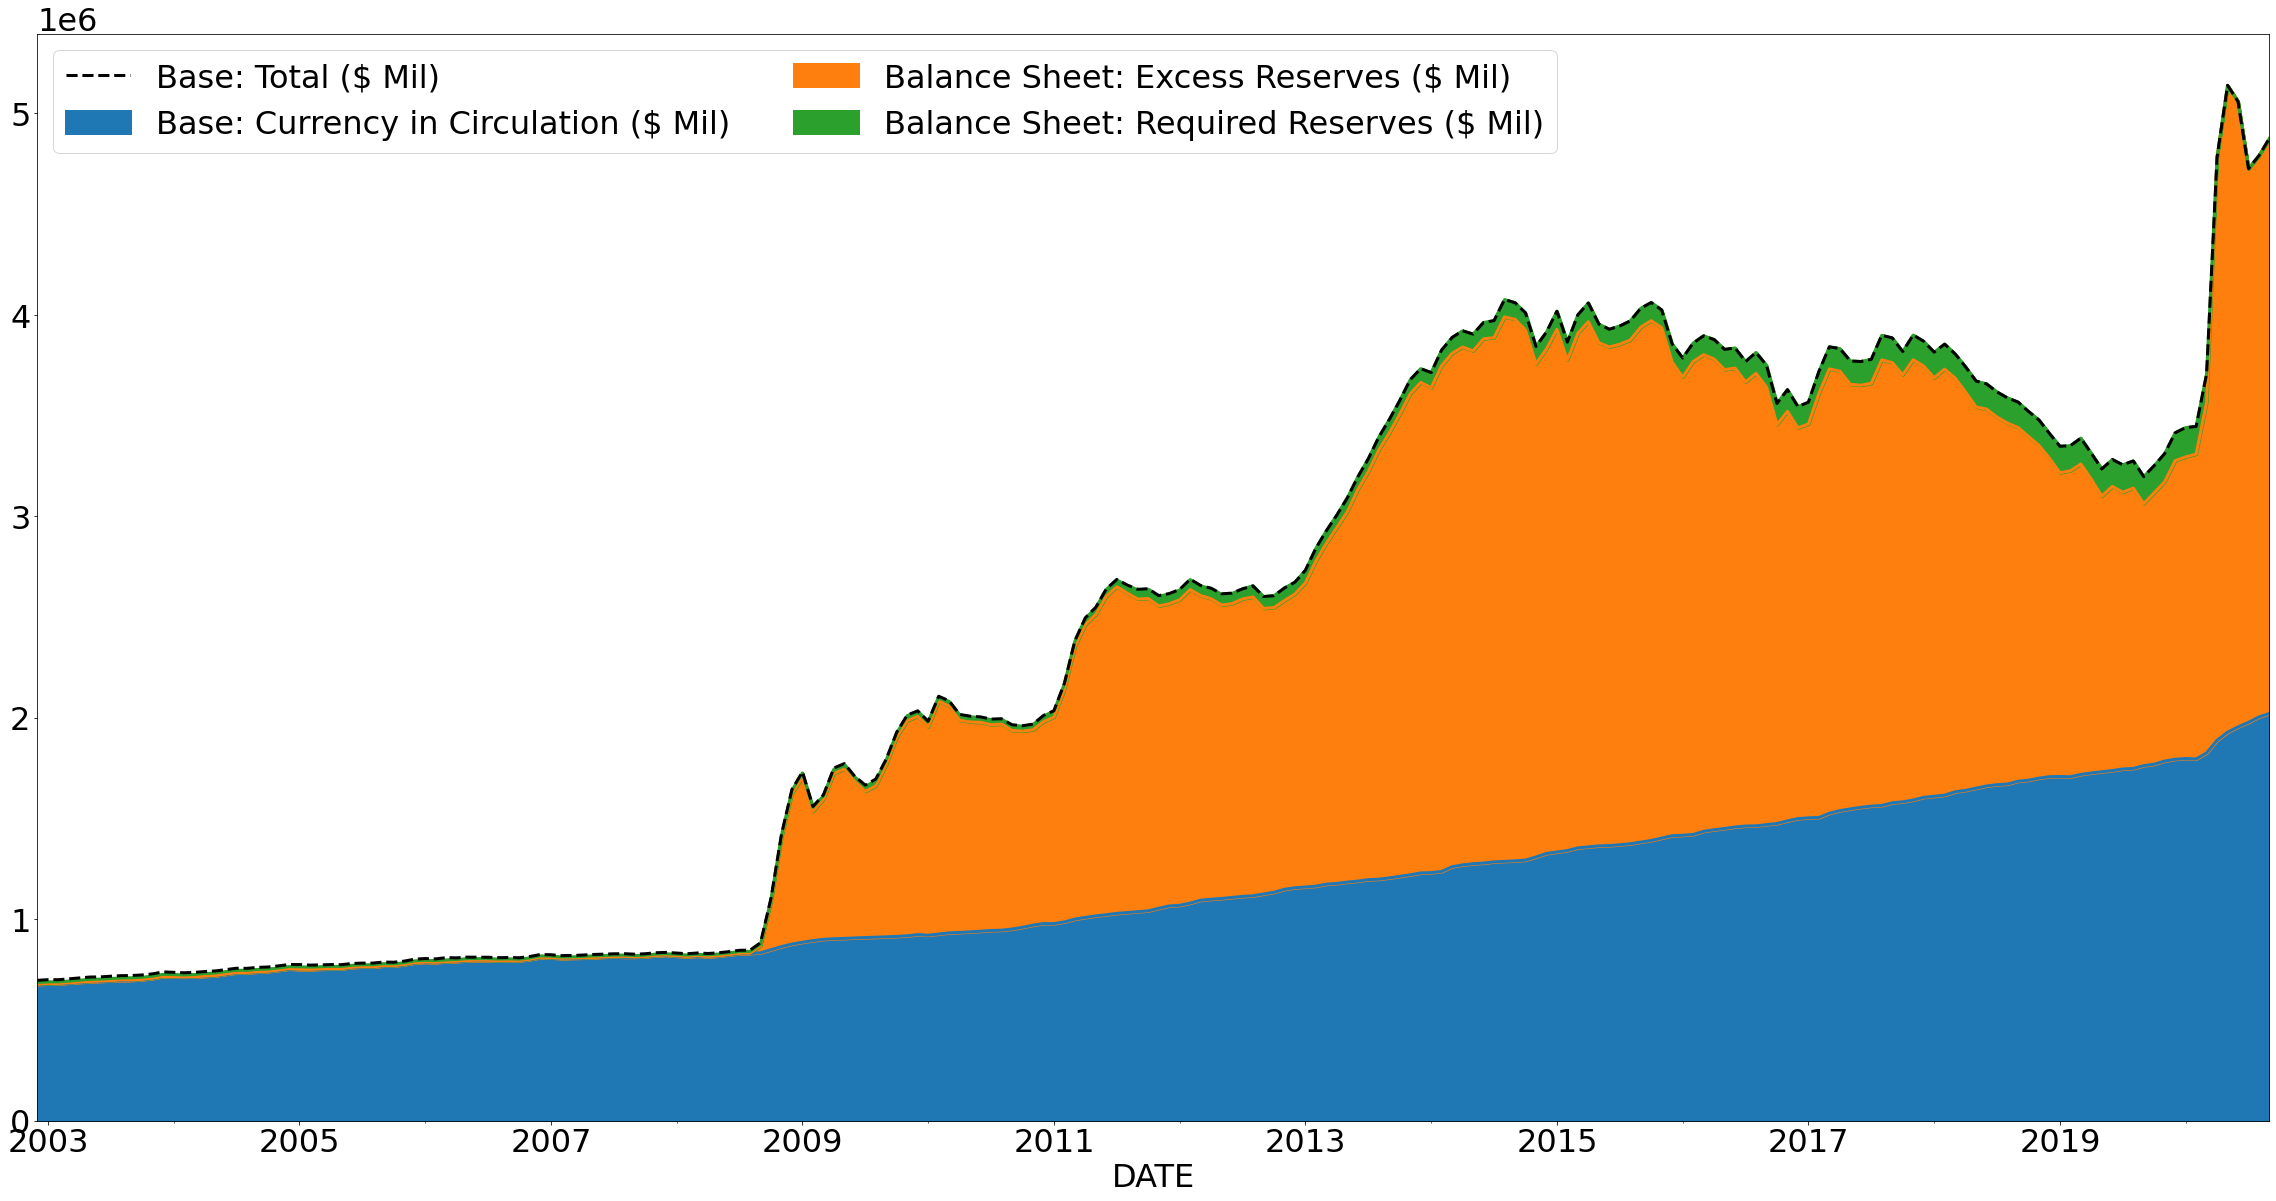

In [16]:
money_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

>Reserves held as vault cash are held by banks themselves. They do not receive interest. Let's represent this distinction between reserves at the Federal Reserve and reserves held as vault cash

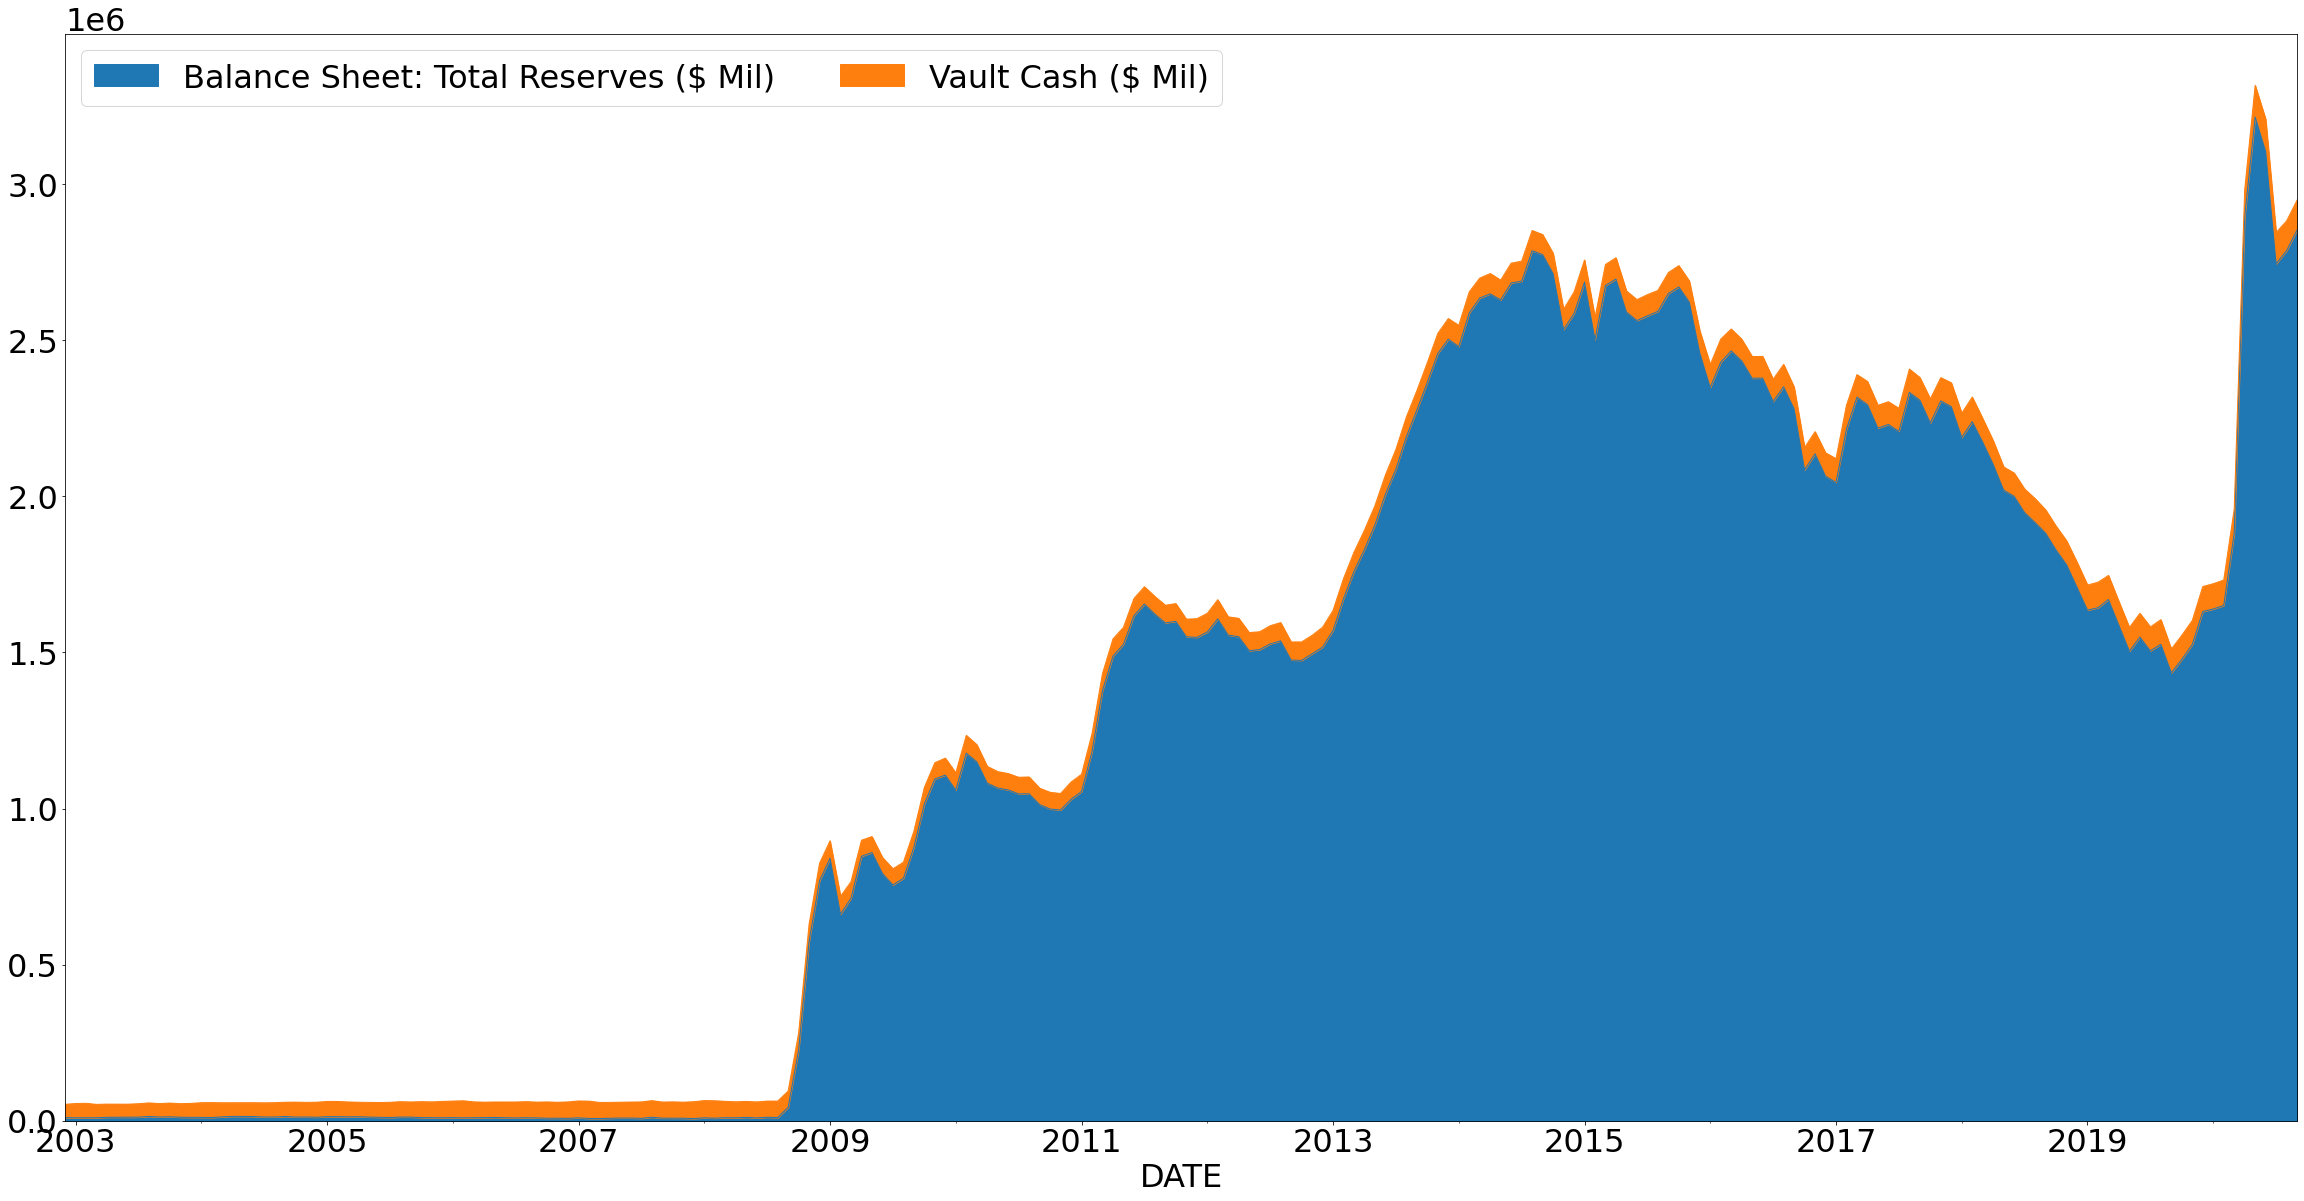

In [17]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Vault Cash ($ Mil)"]
plot_stacked_lines(data, reserve_vars)

>Next, let's distinguish between not only excess and required reserves, but also between reserves held at the Fed and reserves held as vault cash. 

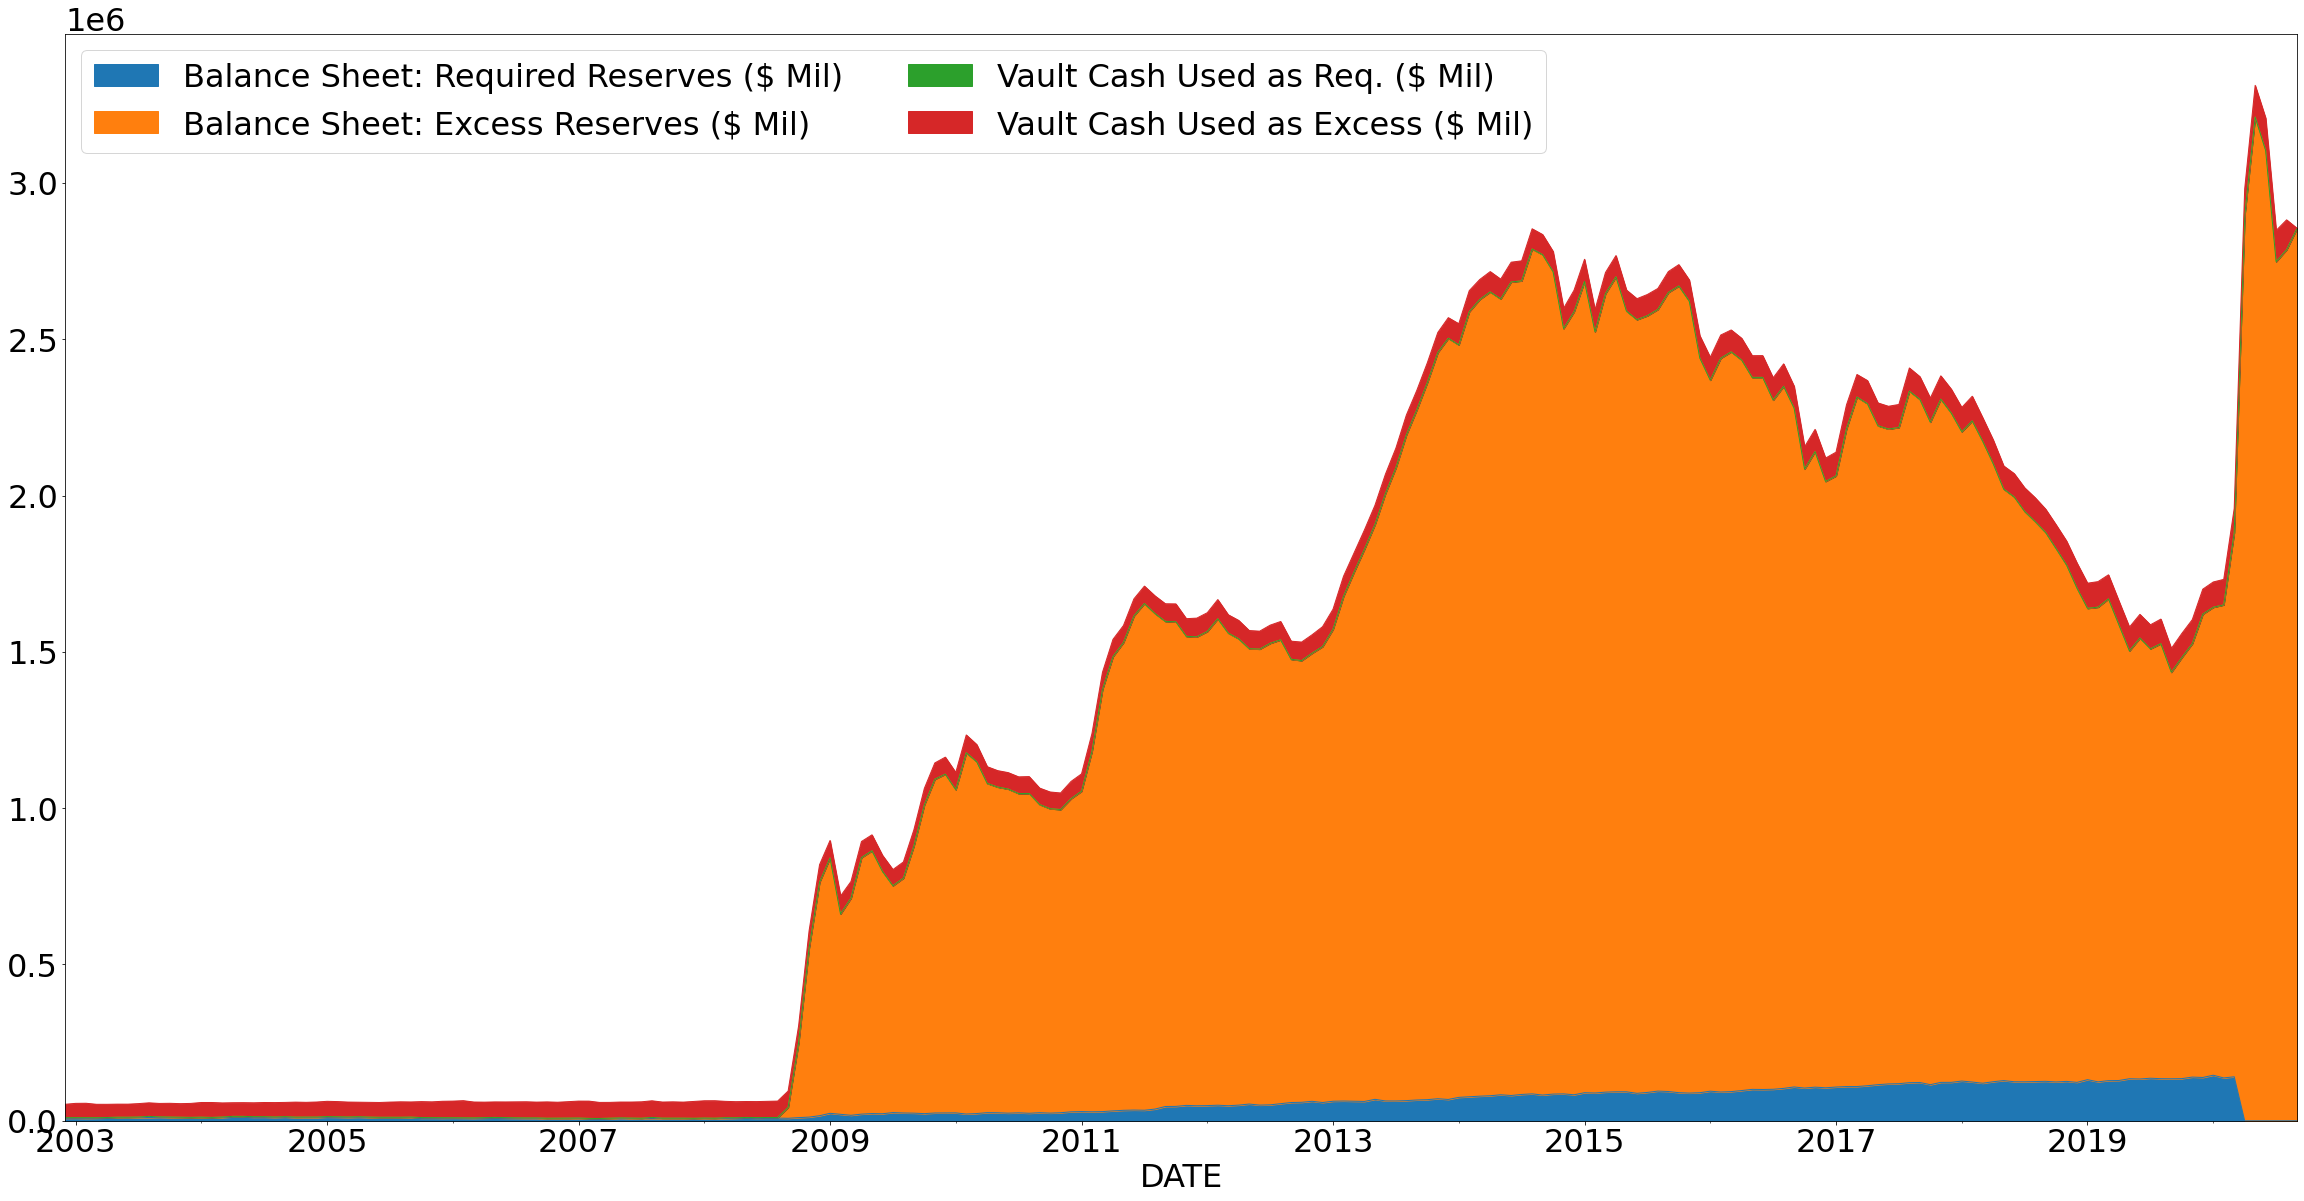

In [18]:
# vault cash used as excess reserves = vault cash - vault cash used as required reserves
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(data["Vault Cash Used as Req. ($ Mil)"])

reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
               "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
               "Vault Cash Used as Excess ($ Mil)"]
plot_stacked_lines(data, reserve_vars)

As seen from the plot above, vault cash was the primary means of holding reserves before 2008. After the 2008 crisis, nearly all reserves have been held on account. 

There is a lot going on beneath the surface of these measures. To get a better idea of how monetary policy works, let's work through the major components of the Federal Reserve's balance sheet. 

## Assets Held by the Federal Reserve

Like any bank, the Federal Reserve not only takes deposits, it invests in interest bearing assets. For most of the Fed's history, these investments were predominantly, if not wholly, comprised of U.S. Treasuries -i.e., loans to the federal government. The Federal Reserve greatly expenanded operations after 2008. It began investing in mortgage backed securities and lending to private banks, holding debt from federal agencies as well as to central banks in other countries with central bank liquidity swaps. All of these can be thought of as influencing the total stock of base money. In addition to these, the Federal Reserve also lends in the overnight lending market using repurchase agreements (repos).

Next, we'll plot the composition of the Fed Reserve's balance sheet. The balance sheet is split between assets and liabilities. First, we'll consider teh Fed's assets. We'll plot securities held by the Fed. 
>Securities are promises to repay by the borrower to the holder of the security.

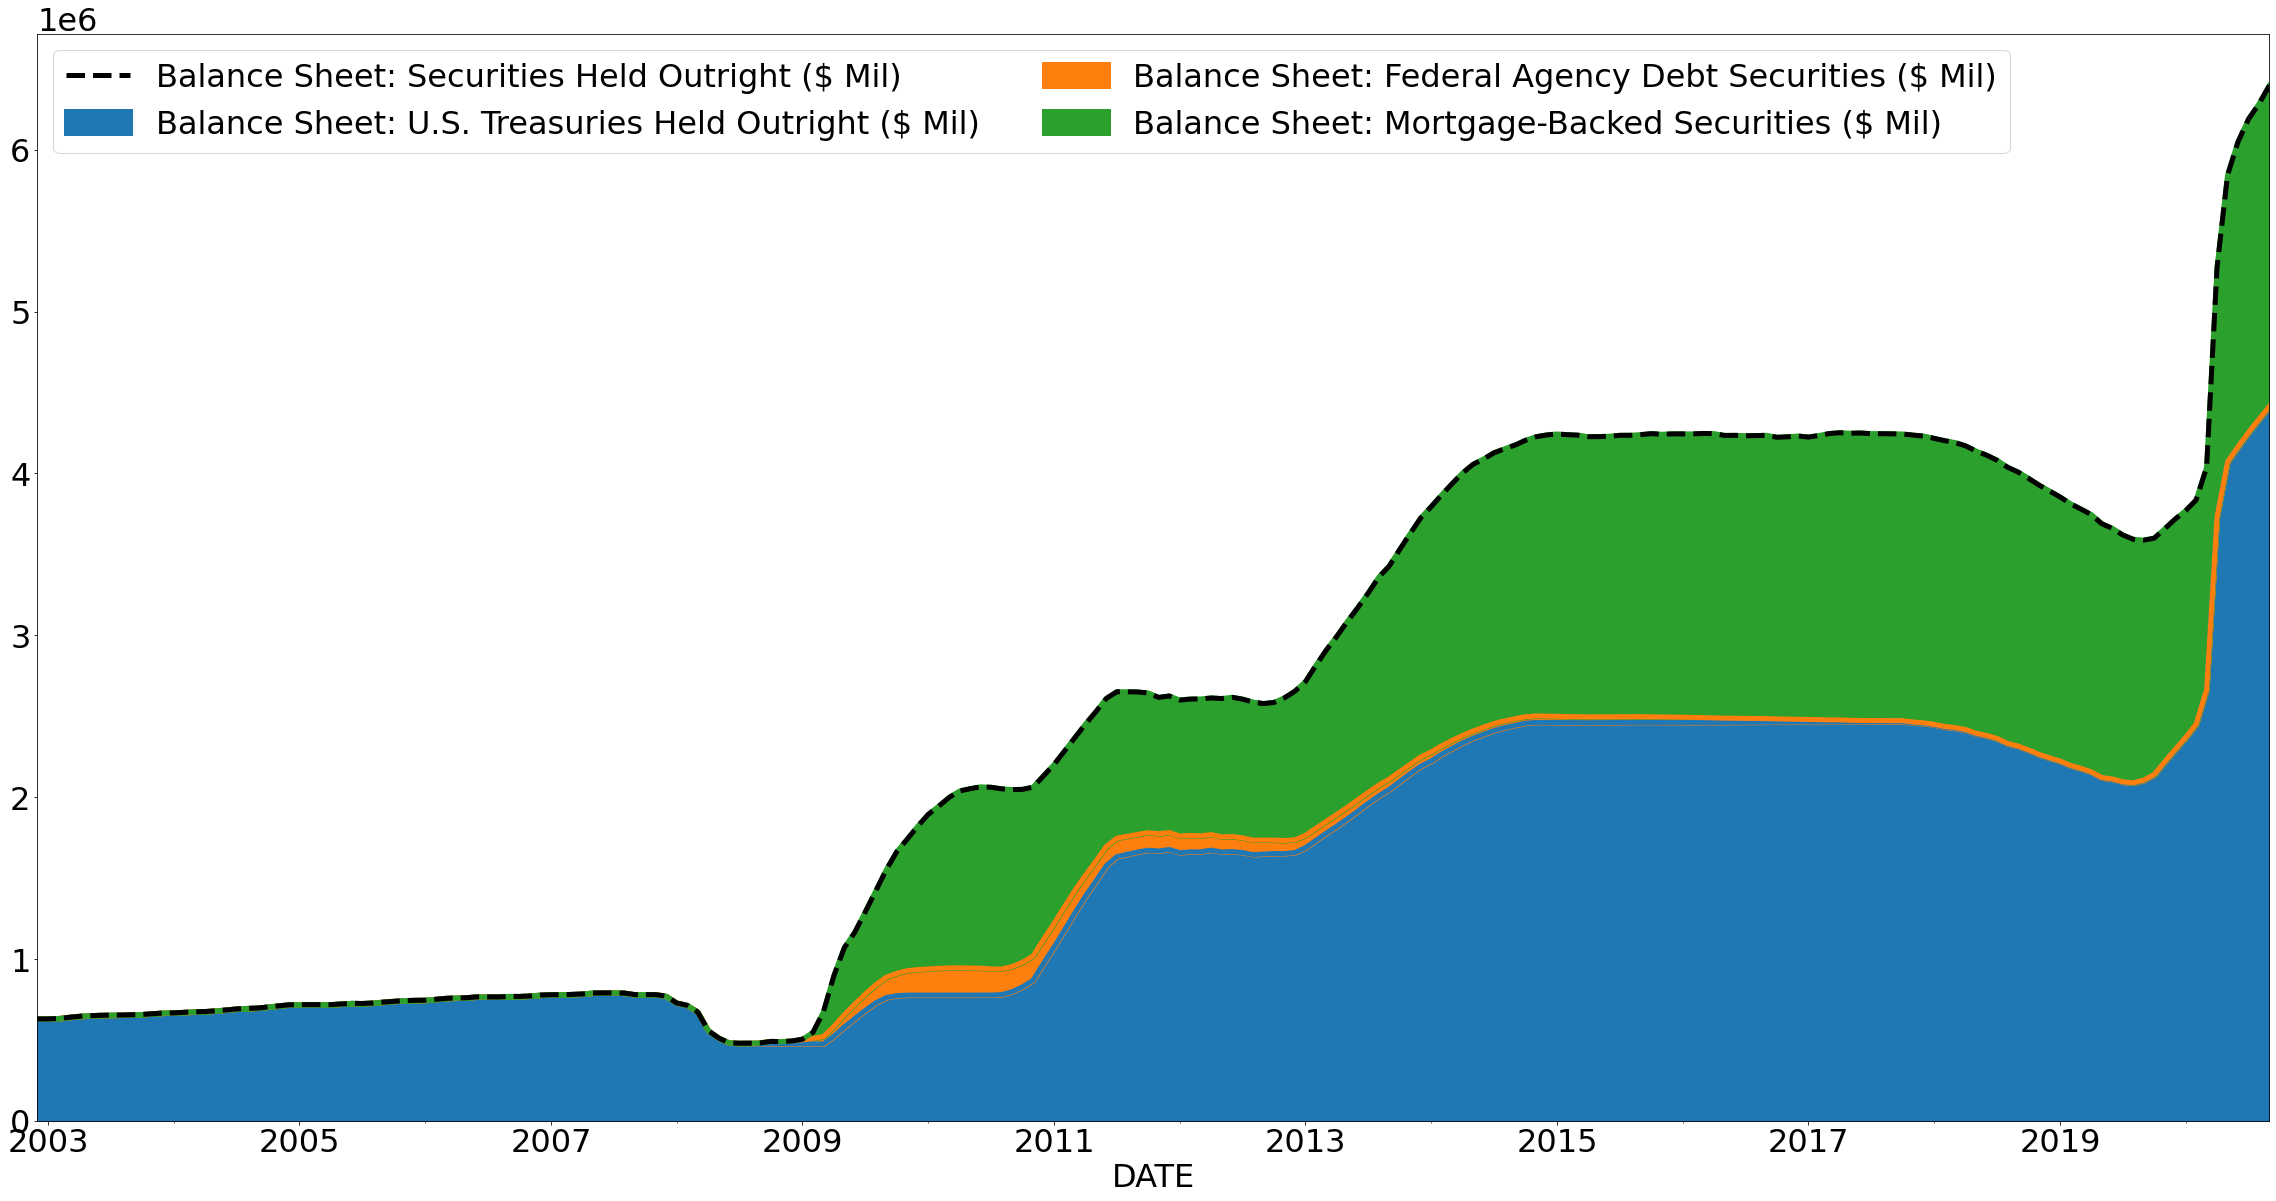

In [19]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
# these three subcomponents above comprise the vallue of securities held outright in it's entirety

# the total value of securities held by the Fed, 
plot_stacked_lines(data, account_vars, linewidth = 5, total_var = "Balance Sheet: Securities Held Outright ($ Mil)")

The mix of assets held by the Fed Reserve indicates the particular markets that it supports relative to those markets that do not receive direct support. From the data, it is clear that the Fed Reserve provides significant support for 1) Federal borrowing and 2) mortgage markets, or in other words, real estates. Interest rates in both markets have remained relatively low througout the period that they have received support. 

Central banks have traditionally supported government spending so it should be no surprise. There is a strong correlation between the size of a central bank's balance sheet and the value of government debt that it owns. Much of the expansion that occured afer 2008, even if it did not support federal borrowing, ultimately ended up serving this purpose. 

we can use a scatter plot to more clearly detect correlation between variables.

C:\Users\0\Desktop\ECON_611\Jupyter\In class Projects\Project 4_Visualizing Monetary Policy\datlib\plots.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = [int(str(ind)[:4]) for ind in df.index]


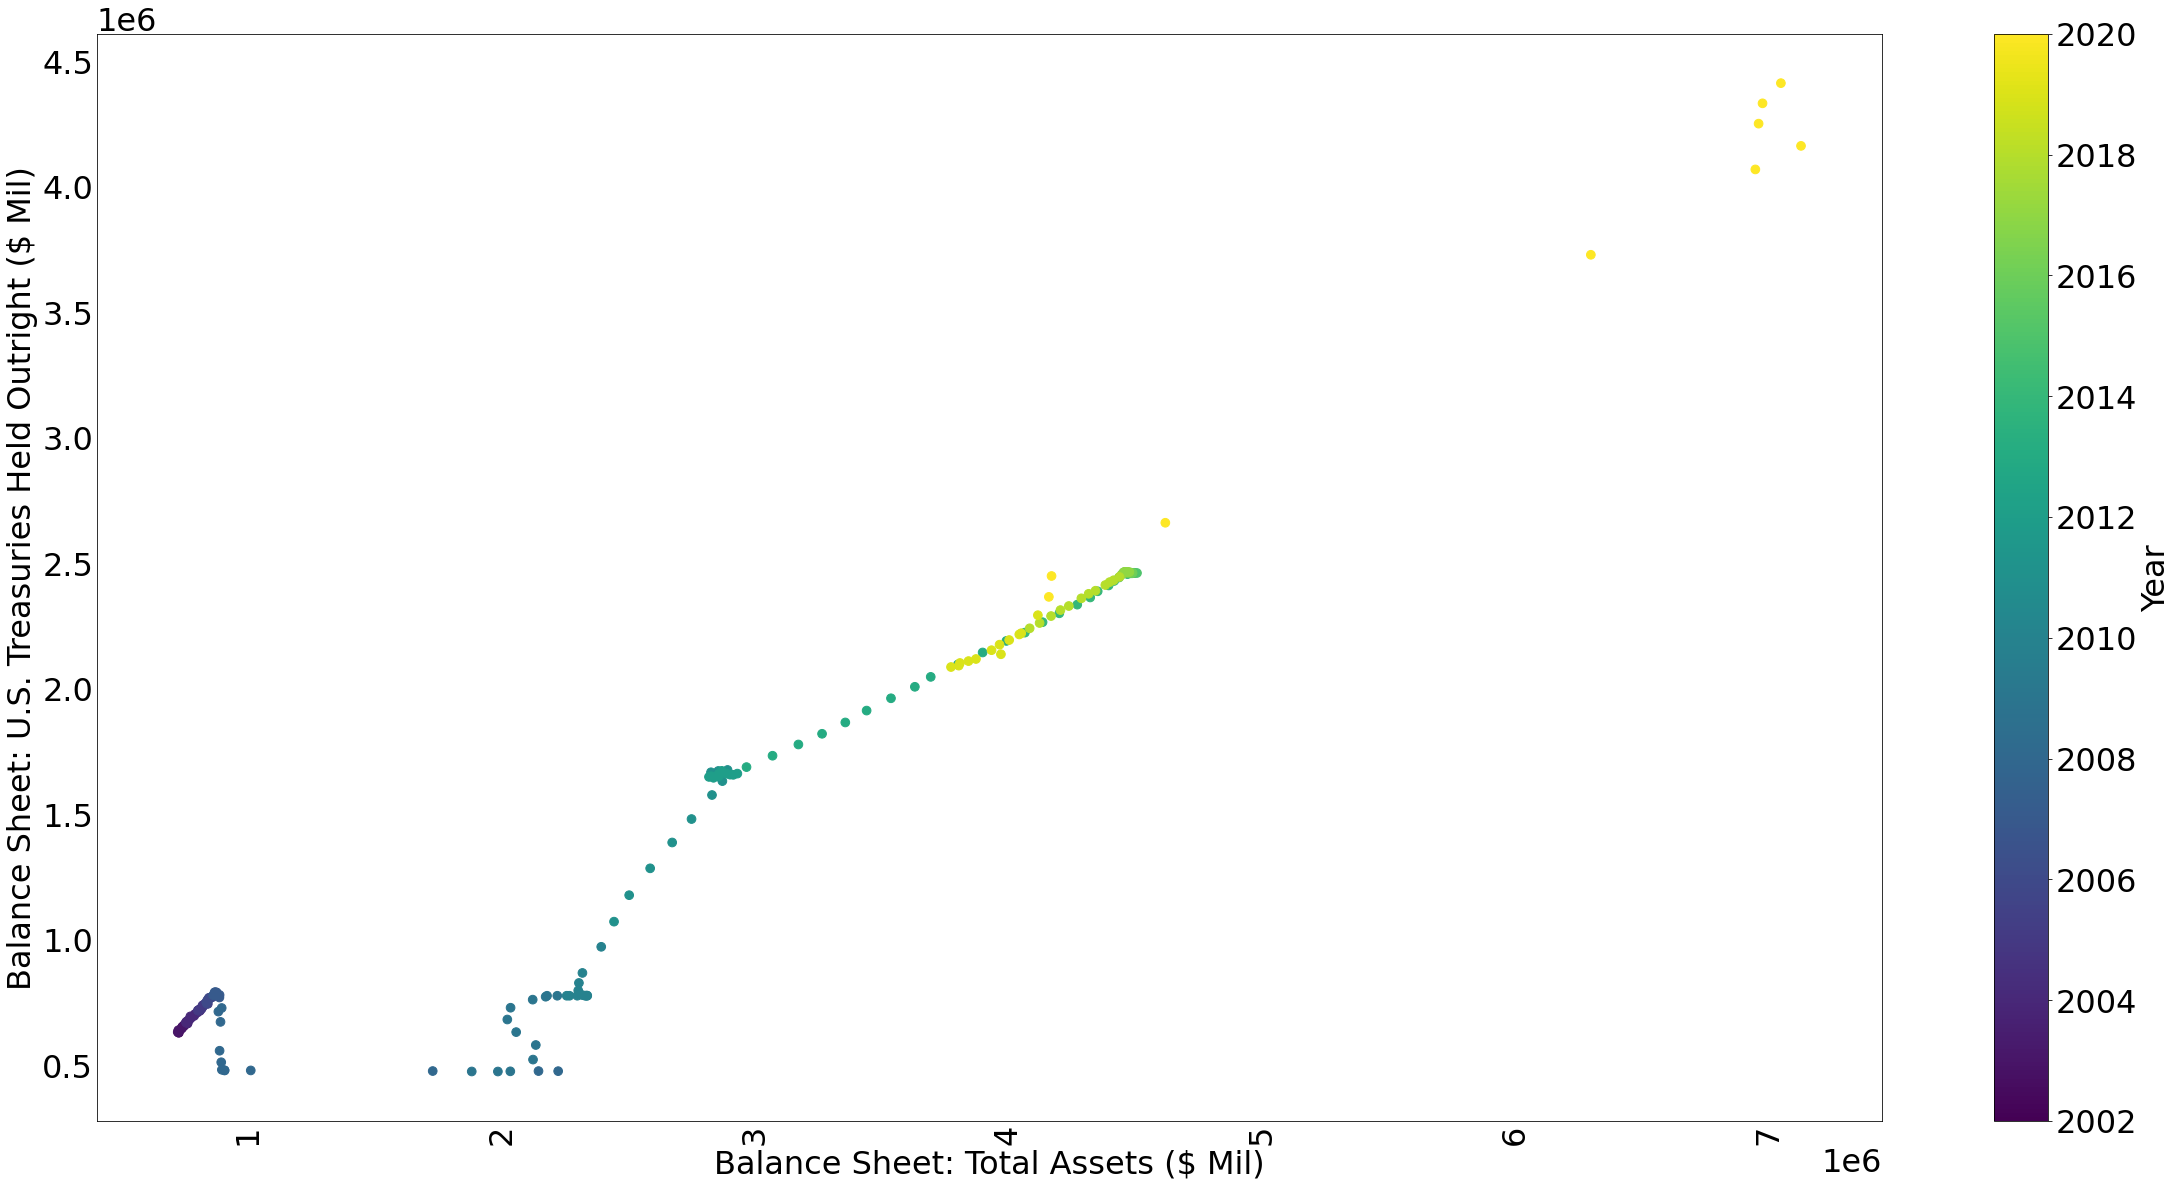

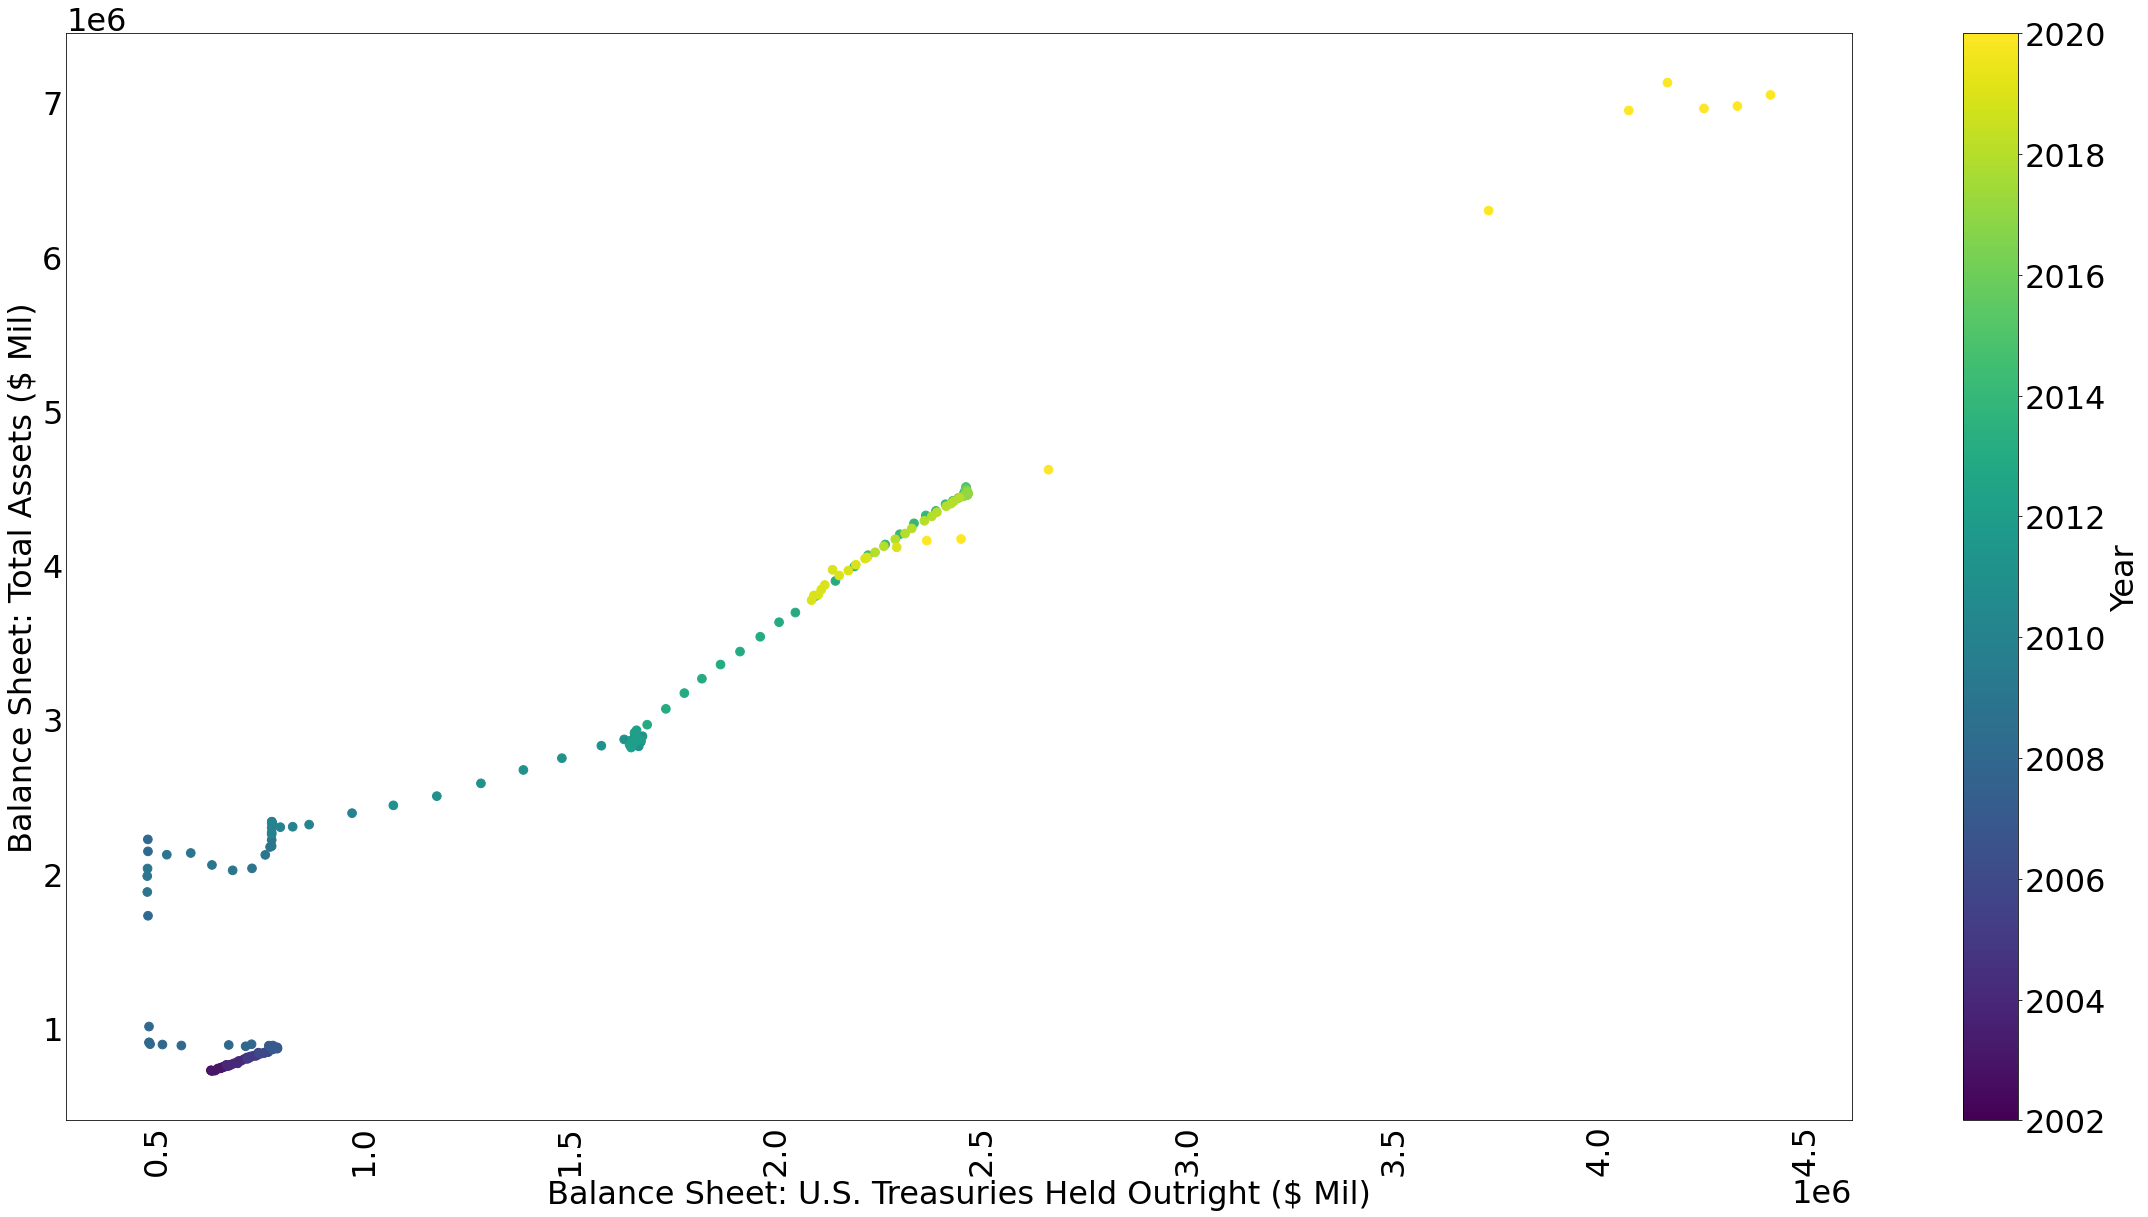

In [20]:
scatter_vars = ["Balance Sheet: Total Assets ($ Mil)",
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

Since we already know the composition of securities held outright by the Fed, it will be convenient to reference this aggregate value when representing the rest of the asset side of the Fed's balance sheet. We add other forms of lending. The Fed lends to other central banks using liquidity swaps or it may lend directly to private financial institutions. Lastly, it may provide loans as repurchase agreements (repos) with borrowers in the interbank, overnight lending markets. 

Next, we'll plot the remainder of the Fed's assets as reflected in its balance sheet.

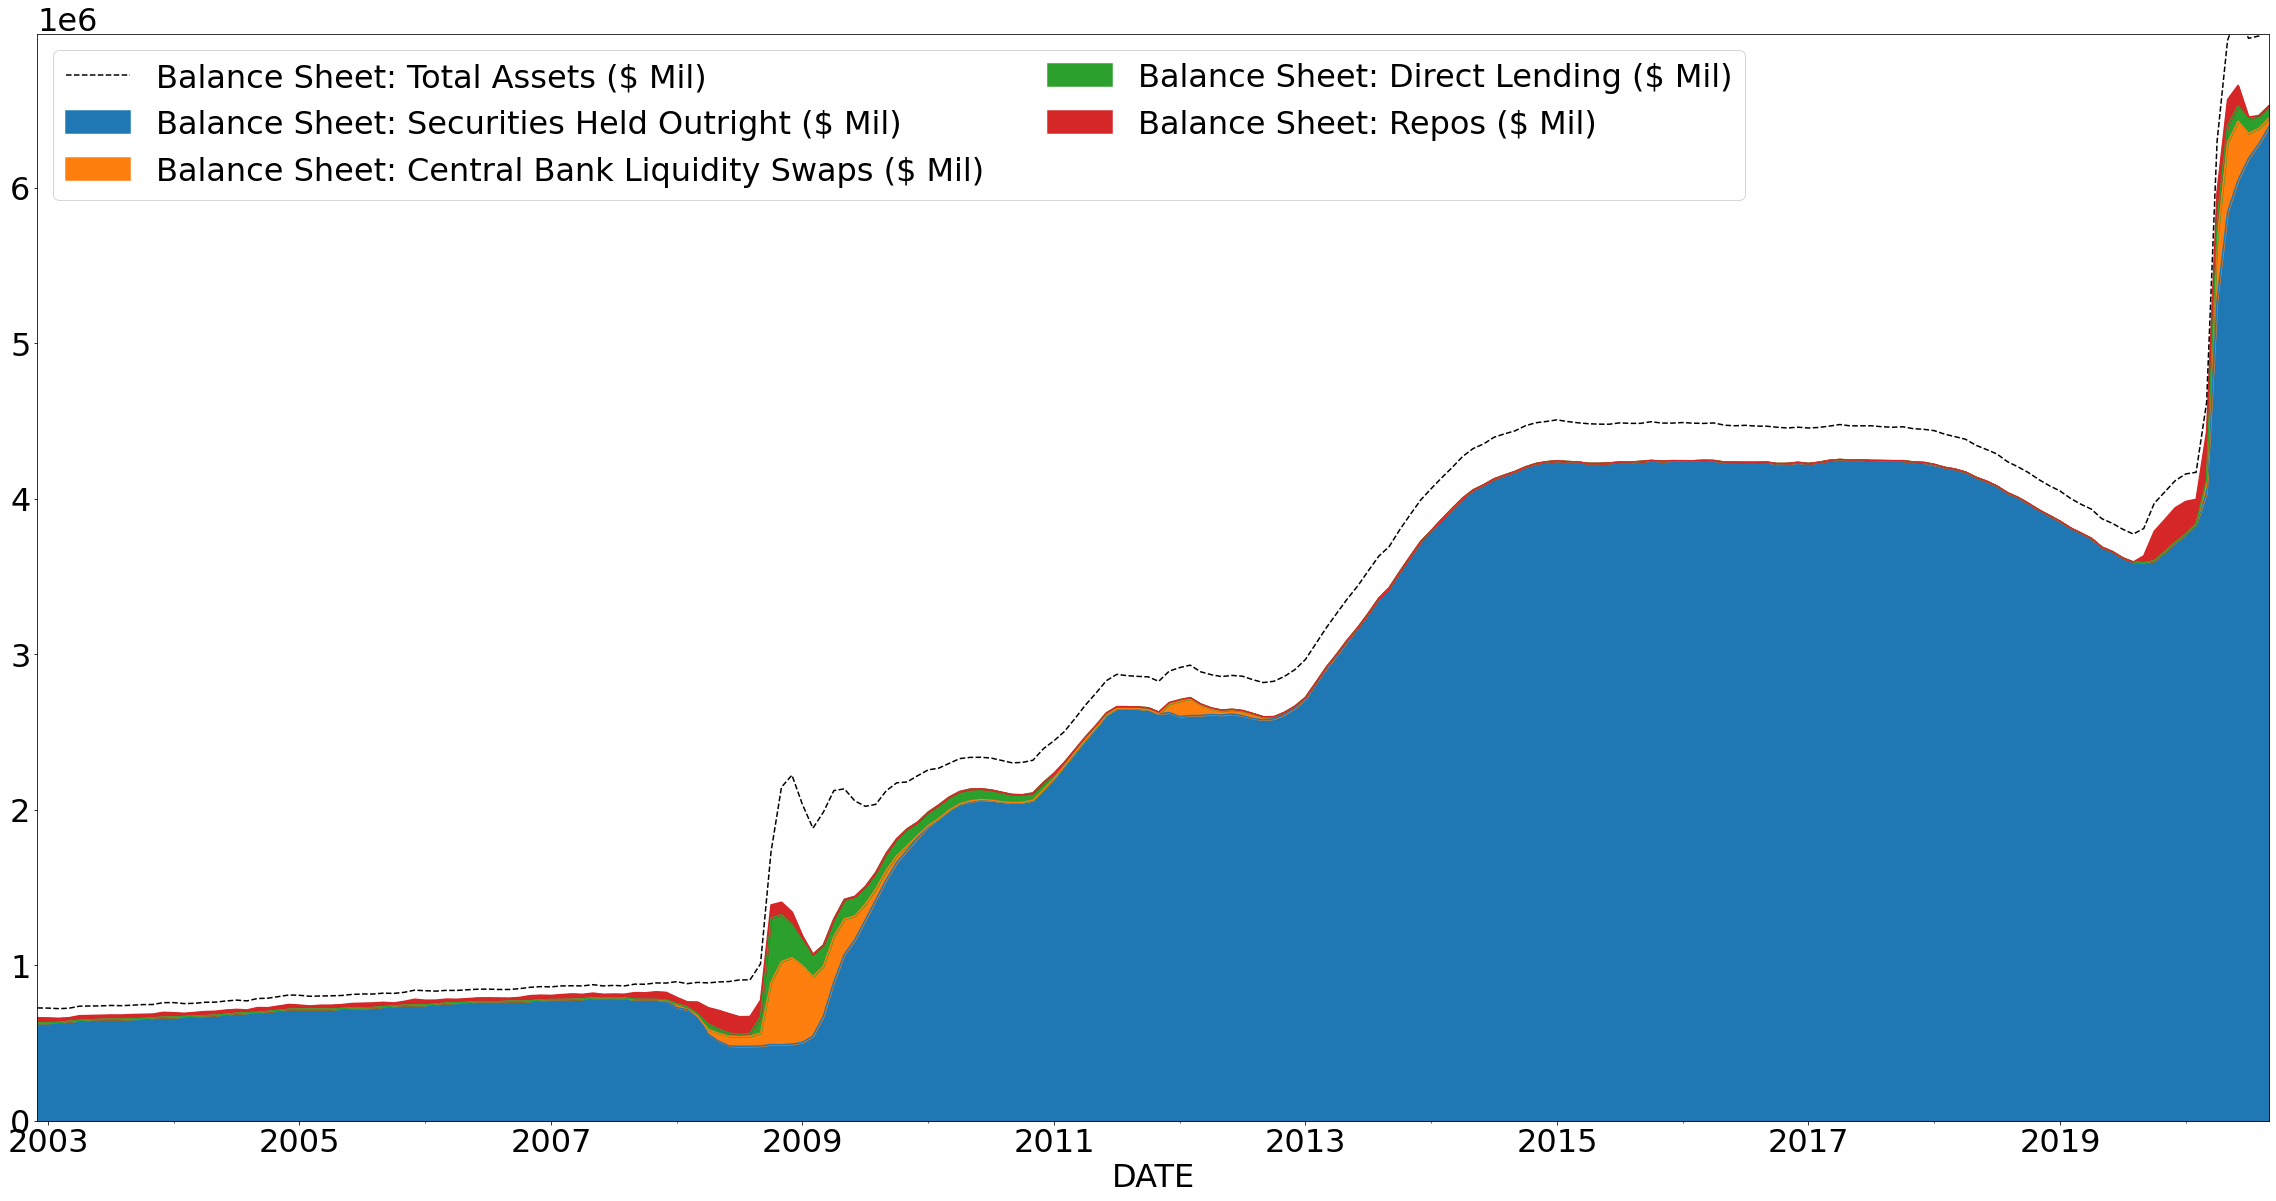

In [21]:
#fedProject
#. . . 
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")

Although a portion of asset side of the balance sheet remains unexplained, it is clear that the Fed Reserve predominantly purchase securities. A fair share of the remaining value of the balance sheet exists as unarmotized changes (usually increases) in the value of securities already heldy by the Fed Reserve. (The value of discounts was left out as it is miniscule in comparison). Let's add this last variable to see how much of the Fed's assets remains undescribed by these variables. 

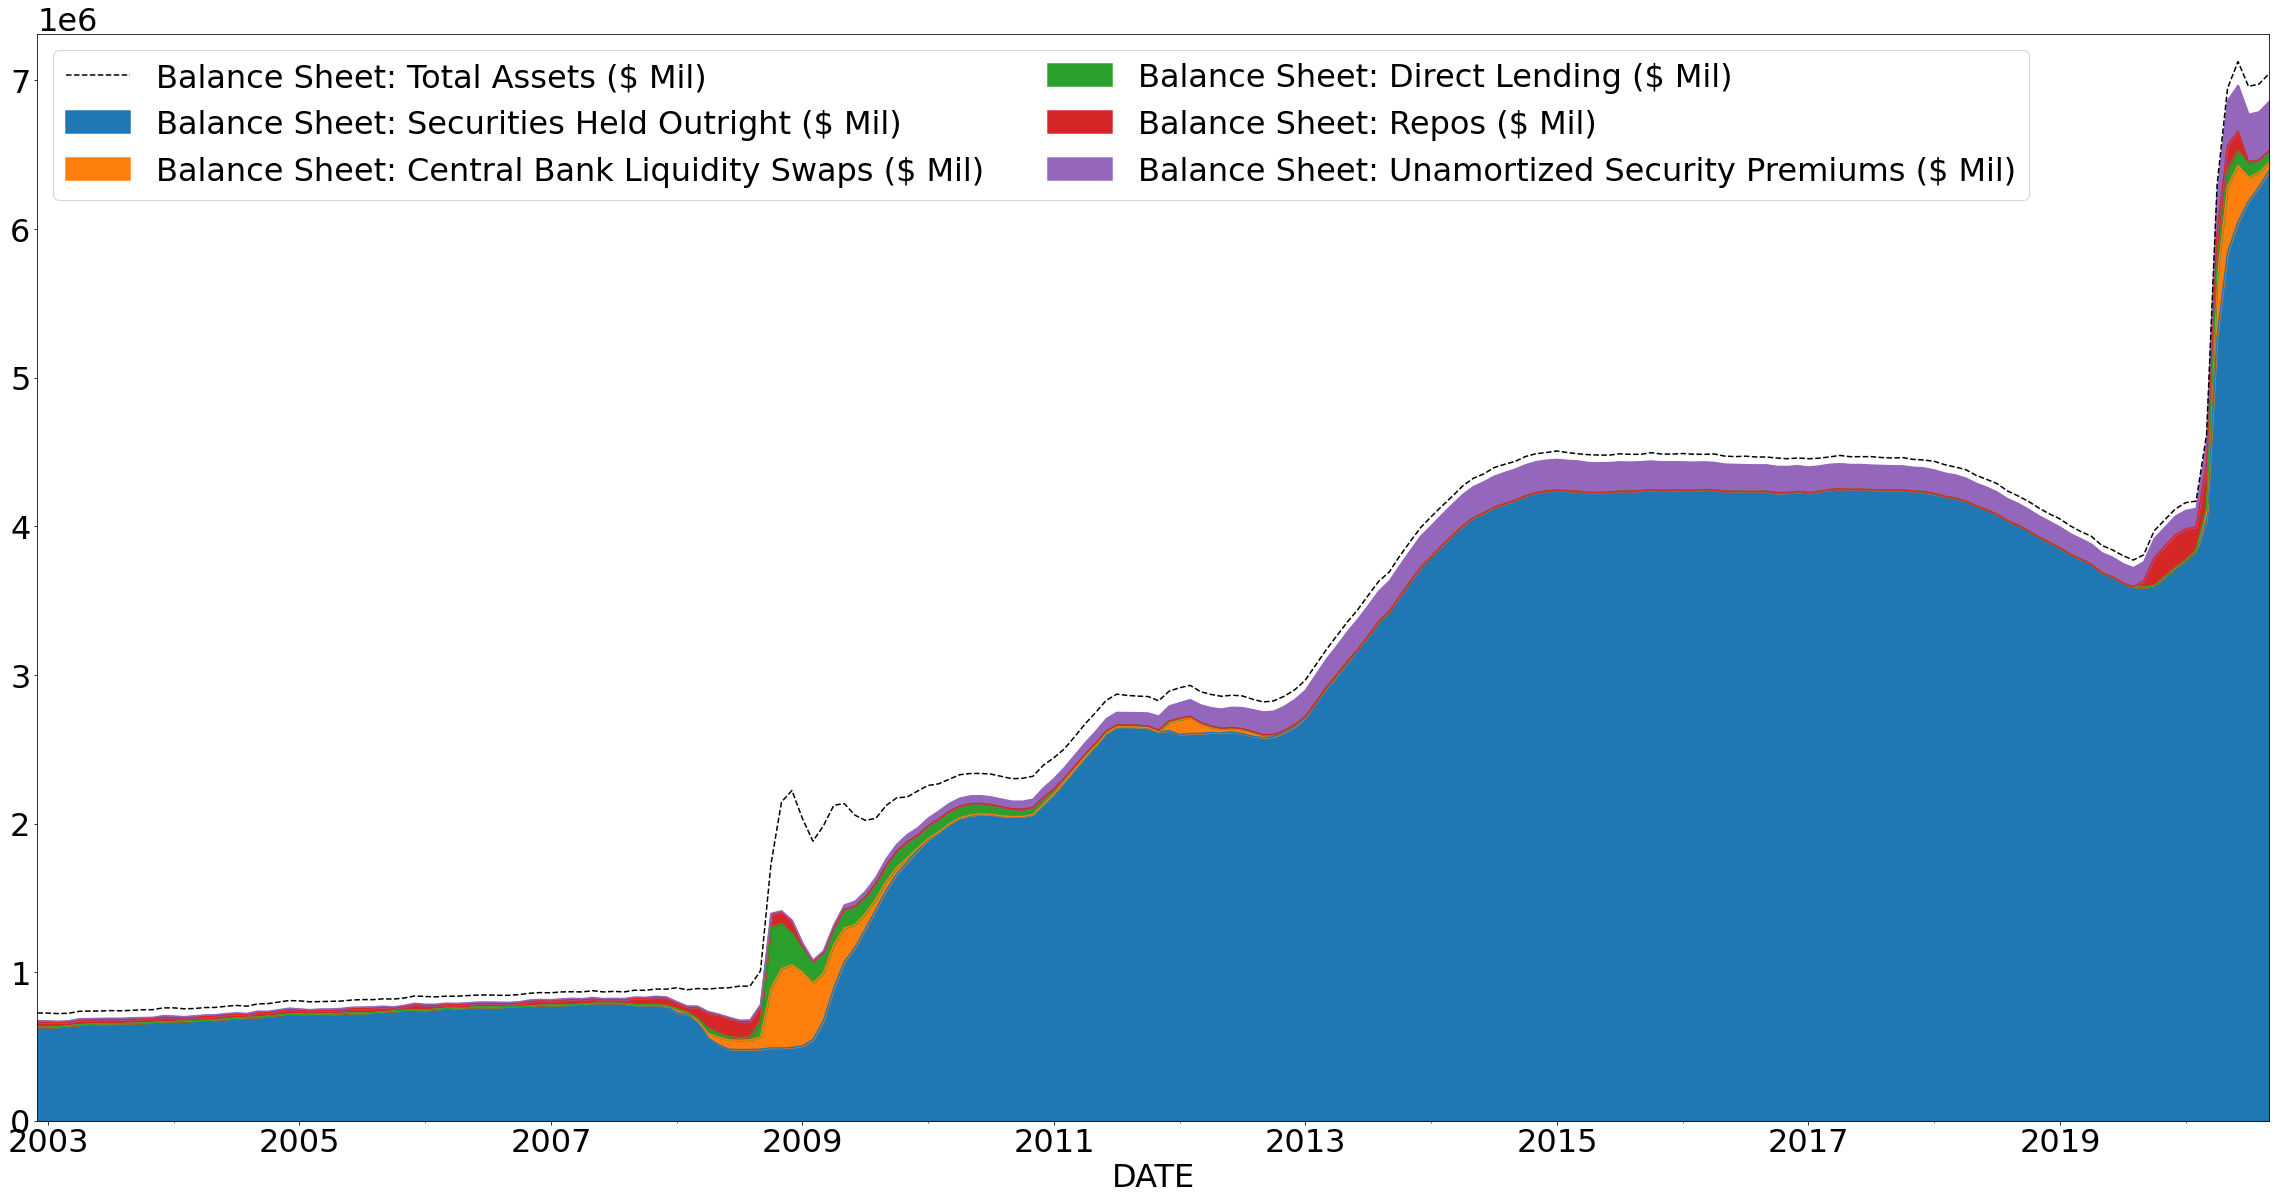

In [22]:
#fedProject
#. . . 
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")

## Liabilities of Federal Reserve
Returning to our earlier discussion of the monetary base and excess reserves, we can think of excess reserves held at the Fed as comprising part of the Federal Reserve's liabilities. But what exactly are excess reserves? Banks have required reserves, or at least they did before the recent COVID-19 measures that reduced required reserves to zero. Required reserves are those funds that they keep on hand in order to fulfill legal reserve requirements. Before the 2008 Crisis, no interest was paid on any reserves. After the 2008 Crisis, interest began to be paid on required and excess reserves held at the Federal Reserve. Reserves in the financial system largely shifted to being held at the Federal Reserve as a result.

Parties that hold excess reserves at the Federal Reserve earn a risk free rate of interest on those deposits. Banks decide between earning this risk free rate of return or investing those reserves in the market.

There are two major sources of deposits at the Fed. Deposits of financial institutions are largely represented by reserves data. The U.S. Treasury, the body that oversees expenditures by the federal government, also holds a deposit account at the Federal Reserve. Much as we added excess reserves and currency in circulation to represent the components of the monetary base, we can add together all reserves and the U.S. Treasury General Account that is held at the Fed to represent deposits held at the Fed. Only a small fraction of unexplained deposits remain.

*There appears to be an error in one deposit account at the Fed in September 2015 as the sum of reserves held at the Fed and the Treasury General Account is greater than the value of all deposits.

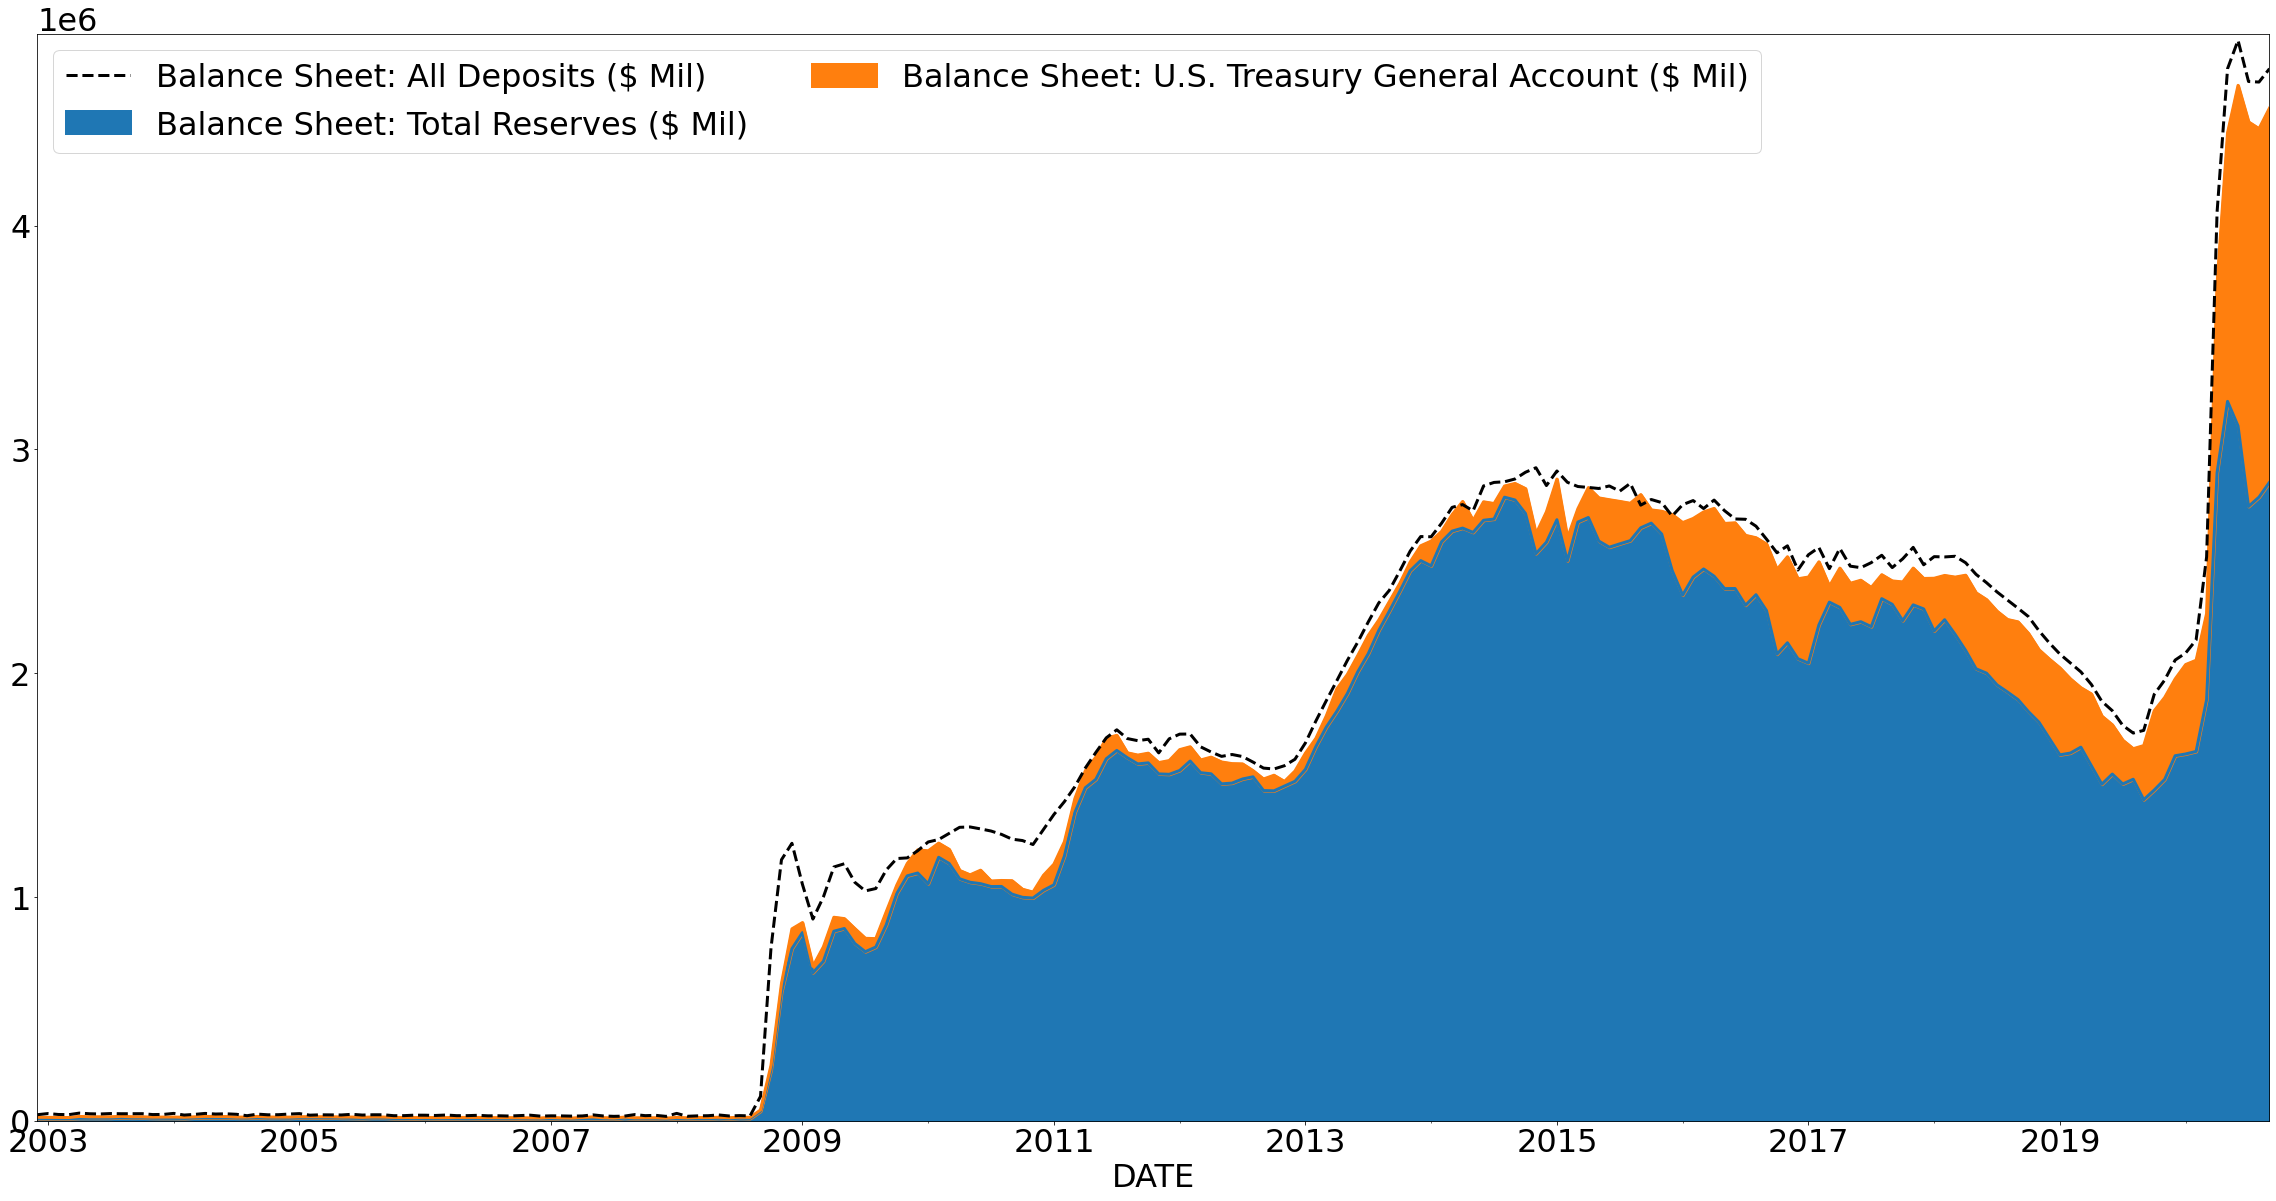

In [23]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: All Deposits ($ Mil)")

Federal Reserve Chariman Benjamin S. Bernanke has explained that the purpose of paying interest on excess reserves was to keep a portion of the monetary base out of circulation. Banks increase their level of deposits so long as they expect that the risk adjust return on remaining investments is less the the rate paid on excess reserves. Thus, one way to conceptualize the liabilities of the Fed is to distinguish between reserves held at the Federal Reserve and Federal Reserve notes outside of the federal reserve. Nearly the entire base is accounted for.

Starting in 2015, requirements to maintain a minimum liquidity coverage ratio as defined by Basil III forces banks to either maintain a minimum value of reserves or high quality liquid assets (HQLAs) in order to make loans, thus limiting the extent to which lending can increase the velocity of the base.

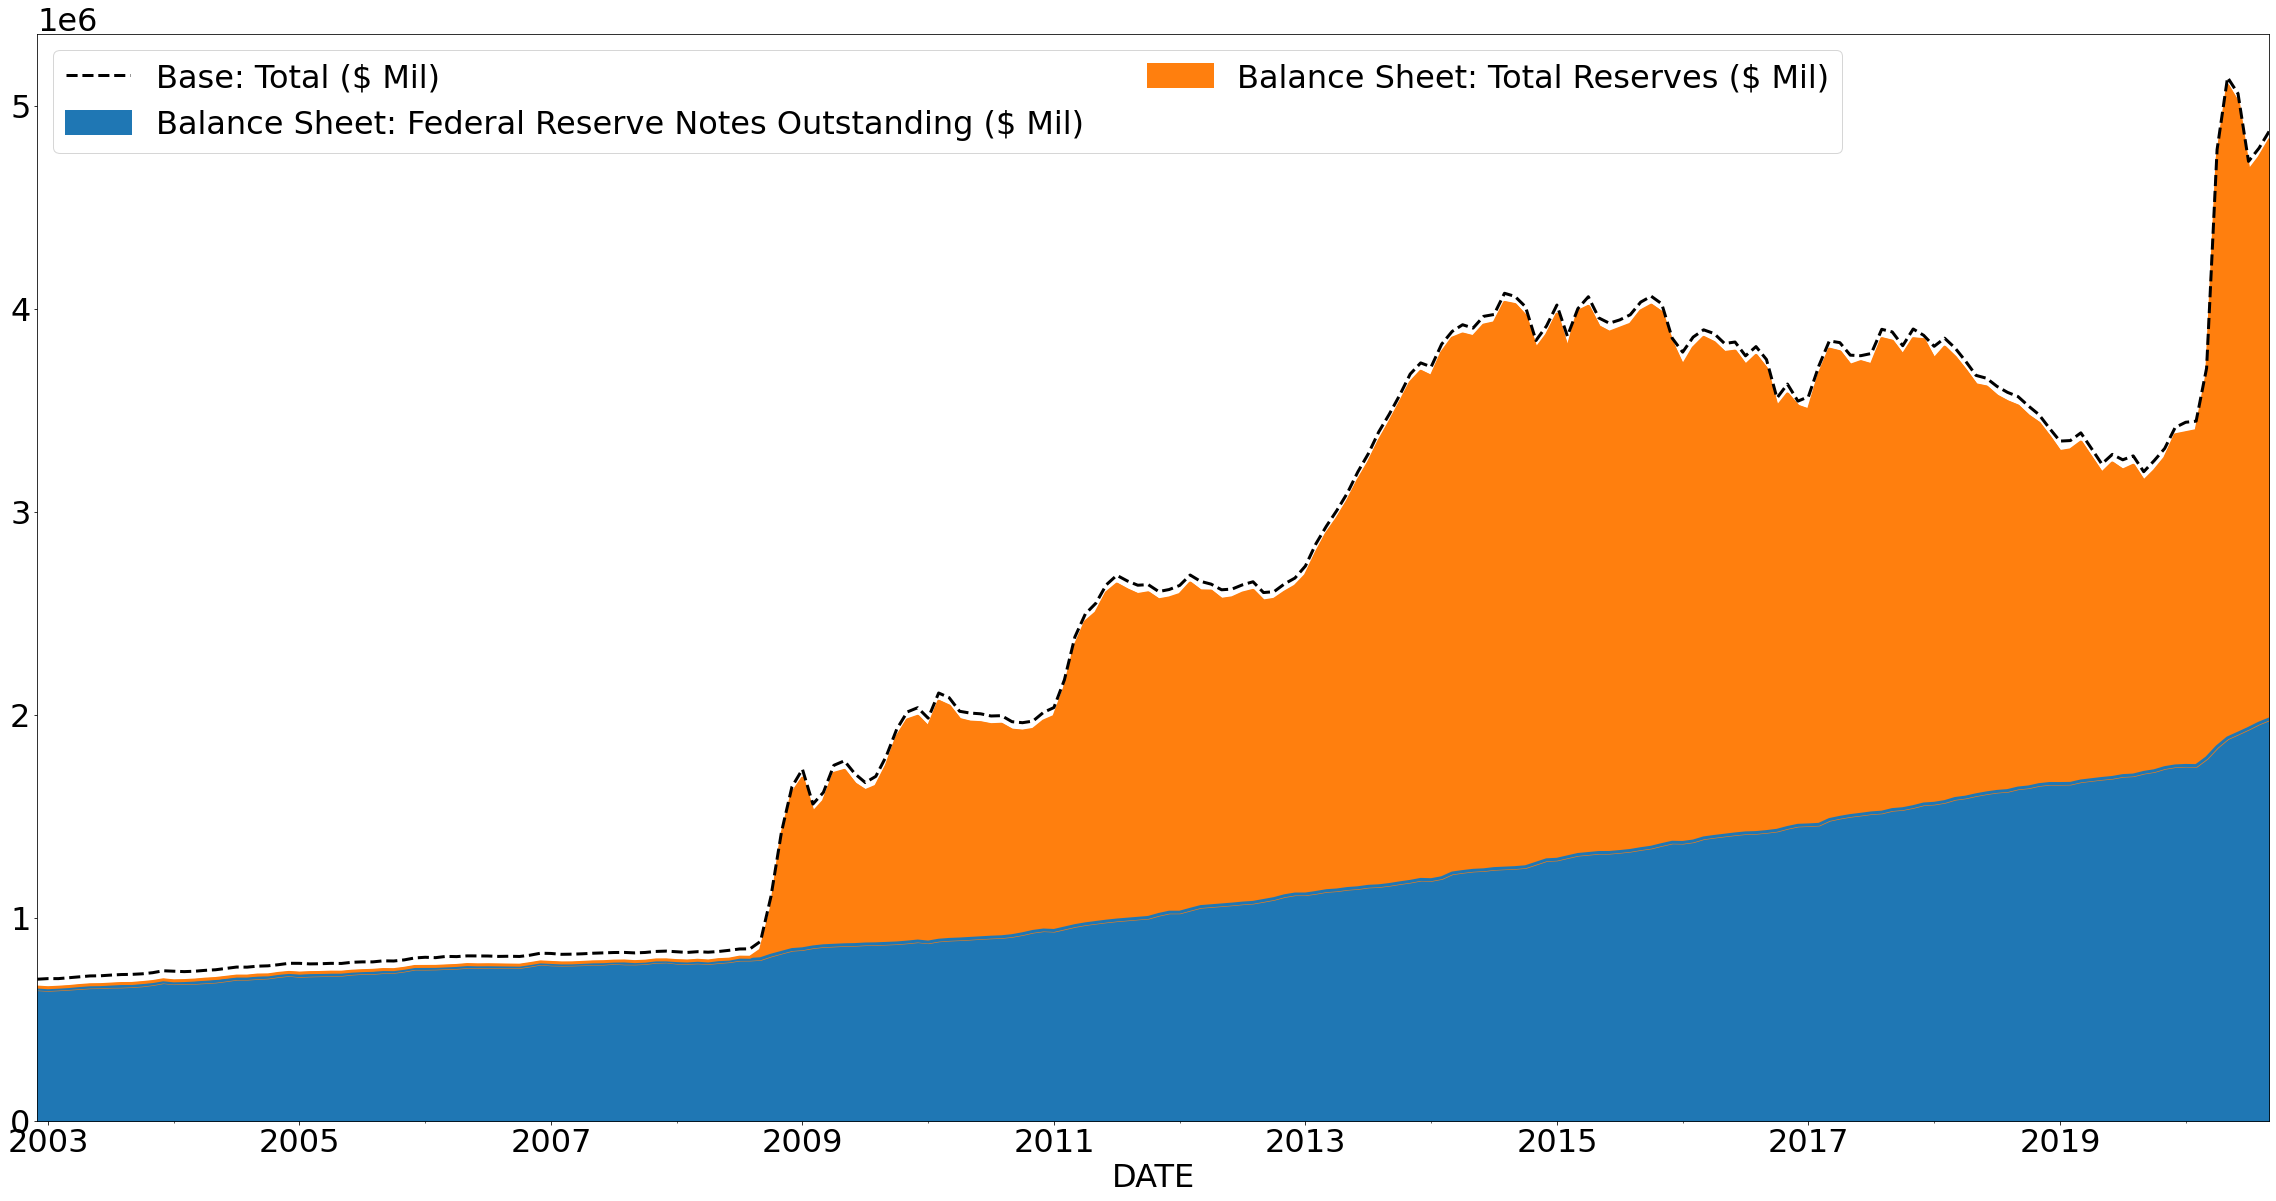

In [24]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

Alternately, we can conceive of all deposits held at the Fed as being divided between deposits from 1) depository institutions, 2) the U.S. Treasury General Account, 3) Other Deposit, as well as a small fraction of deposits not accounted for by 1-3.

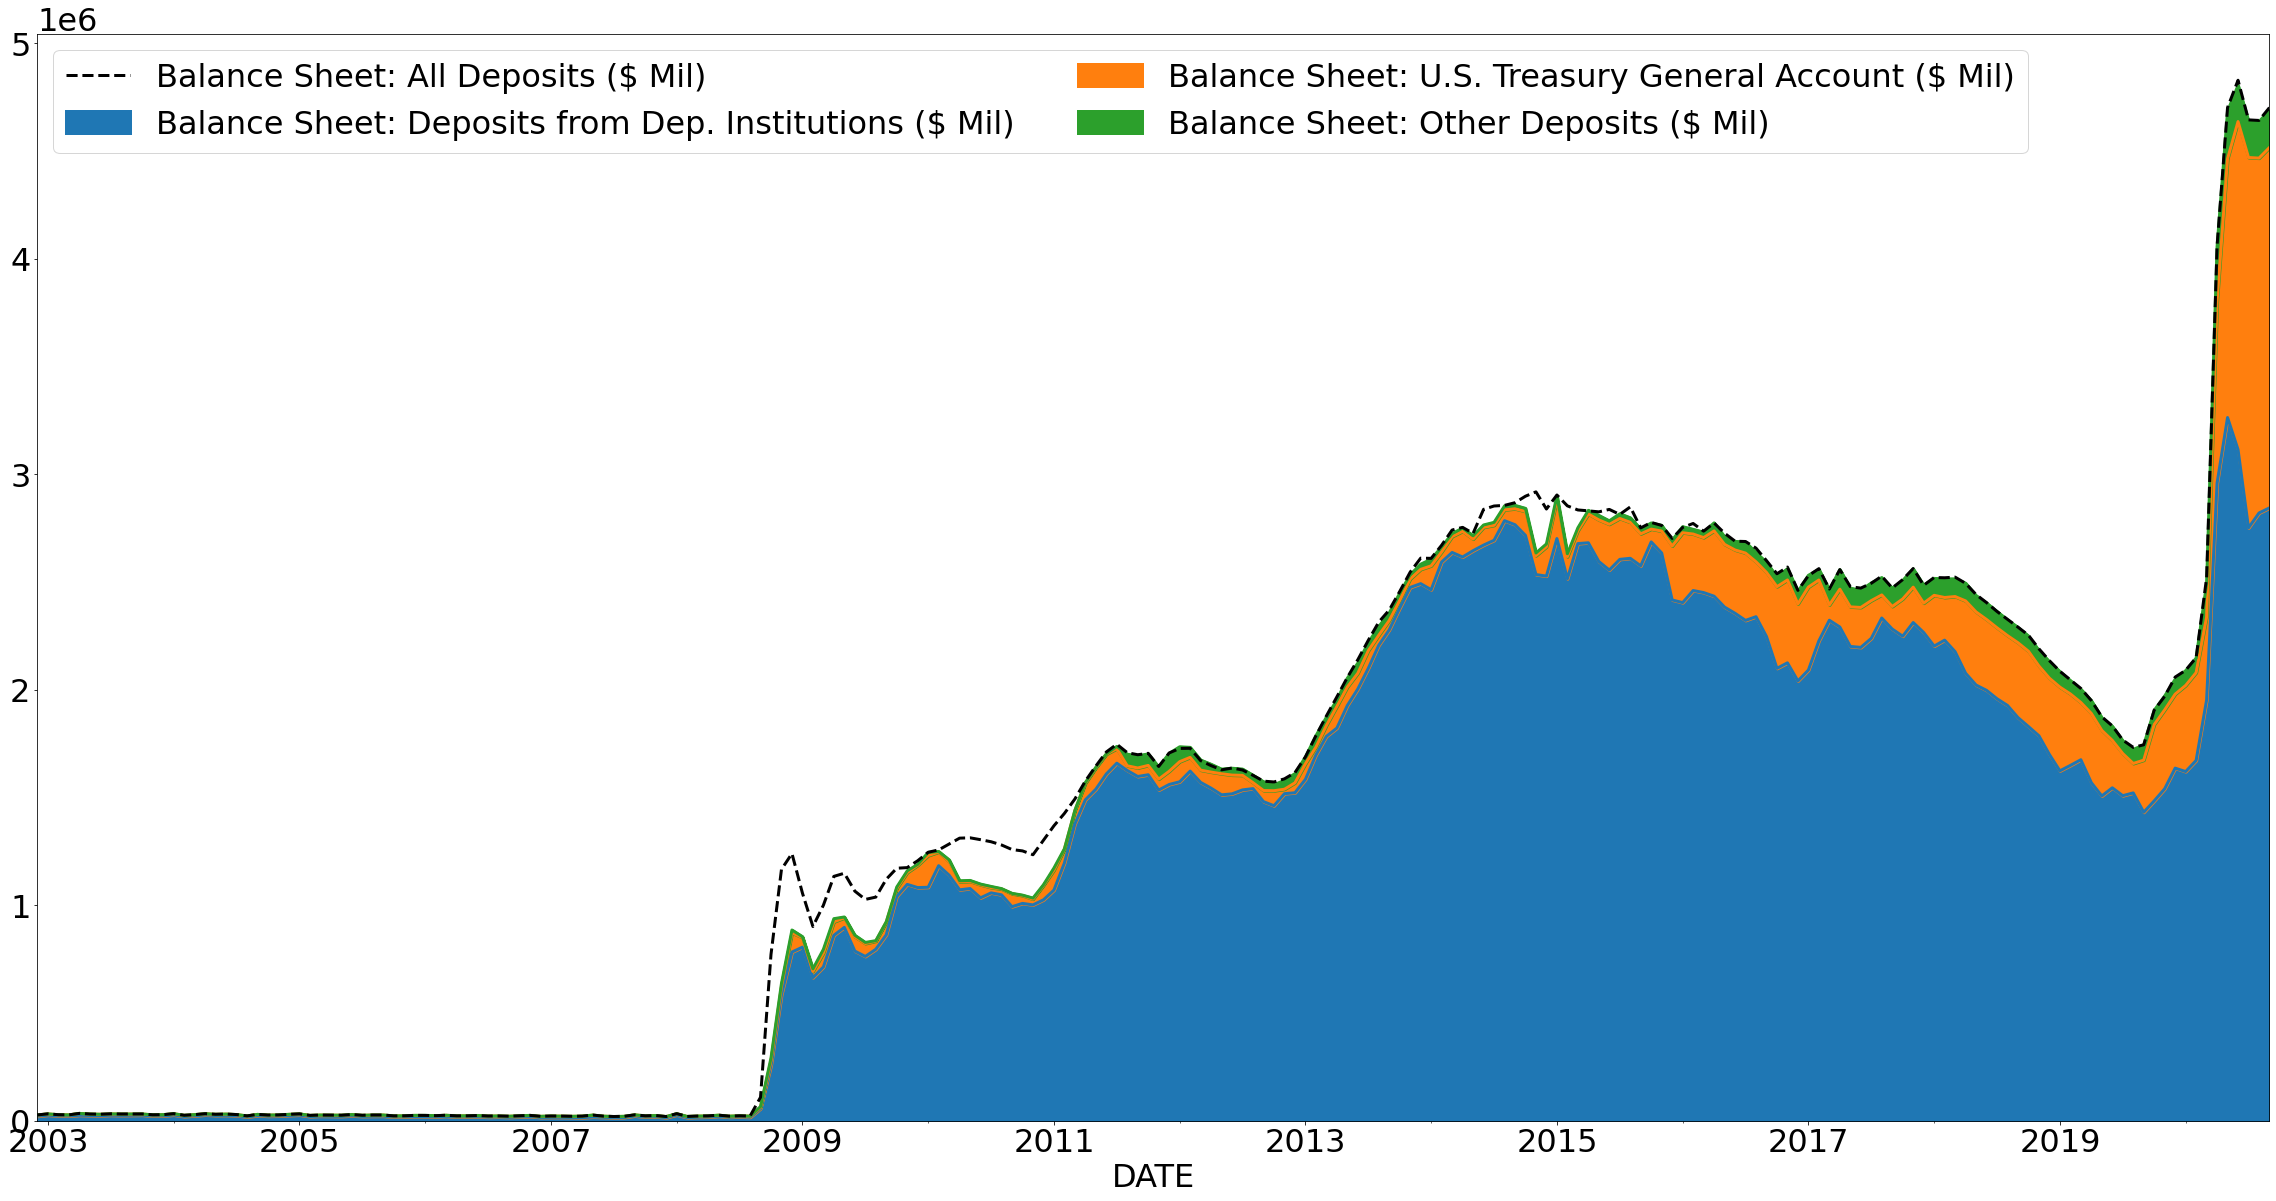

In [25]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: All Deposits ($ Mil)")

Another way to conceptualize these two components of the liability side of the Fed's balance sheet is to compare them to the total level of deposits held at the Fed. So far, these two components have comprised that vast majority of deposits held at the Federal Reserve. And, together with Federal Reserve Notes Outstanding, deposits comprise a significant portion of the liabilities side of the balance sheet. They are therefore a good indicator of monetary policy.

If we include liabilities from activity in the overnight lending market, taking the form of reverse repurchase agreements (reverse repos), we account for nearly the entire liabilities side of the balance sheet.

Finally, let's divide liabilities between Fed Reserve Notes outstanding, Deposits, and Reverse Repos. The last category, reverse repos, represents the Fed borrowing from the overnight lending market. This is the equivalent of removing funds from that market. 

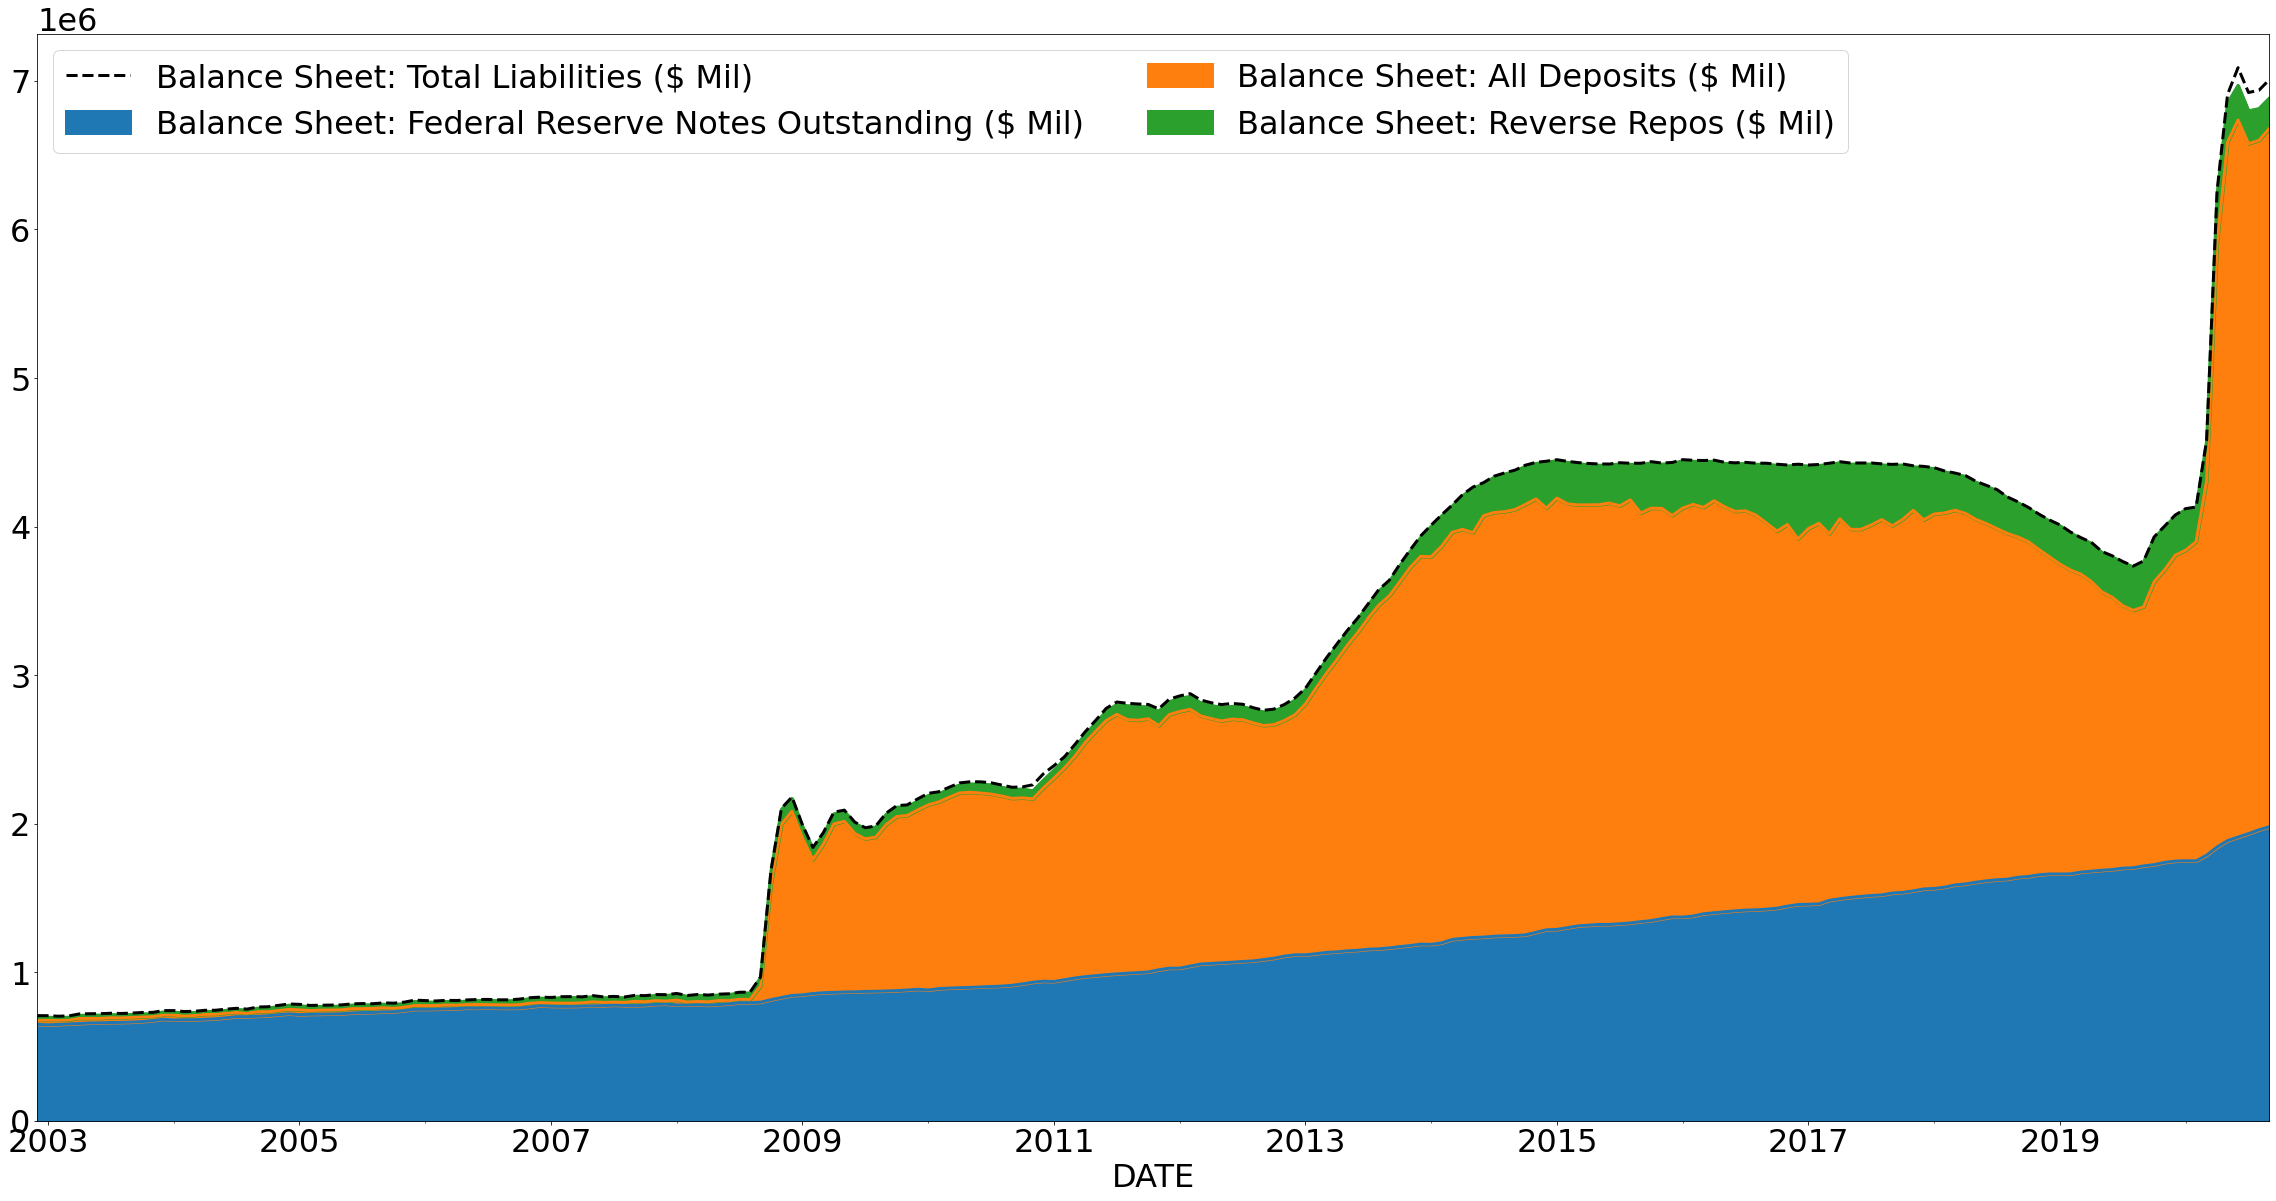

In [26]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: Total Liabilities ($ Mil)")

## Overnight Lending and the Federal Funds Rate

A fair portion of the Federal Reserve's balance sheet is dedicated to influencing the overnight lending market. The overnight lending market is comprised of lending between banks with the intention of temporarily buffering changes in reserve levels. Before reserve requirements were zero, lending in this market occurred primarily to allow banks to maintain minimum reserve requirements. After reserve requirements were moved to zero, lending volumes in this market fell significantly.

The Federal Reserve has multiple means of influencing this market. In the most general terms, the Federal Reserve can either lend to or borrow from investors in the overnight lending market. It lends in this market by accumulating repos. It borrows in the market by creating reverse repos. Repurchase agreements are reflected on the asset side of the Federal Reserve's balance sheet whereas reverse repruchase agreements are reflected on the liability side of the balance sheet. The Federal Reserve does not record this activity as influencing the quantity of base money, likely because operations in this market are thought to be temporary.

A good way to conceptualize the Fed's operations in this market is to account for the net effect of it's holdings of repos and reverse repos. We can plot these two values together and also account for the net effect.

Now, let's show the effects of Fed Reserve operations in the overnight lending market by netting out reverse repos from the value of repos.

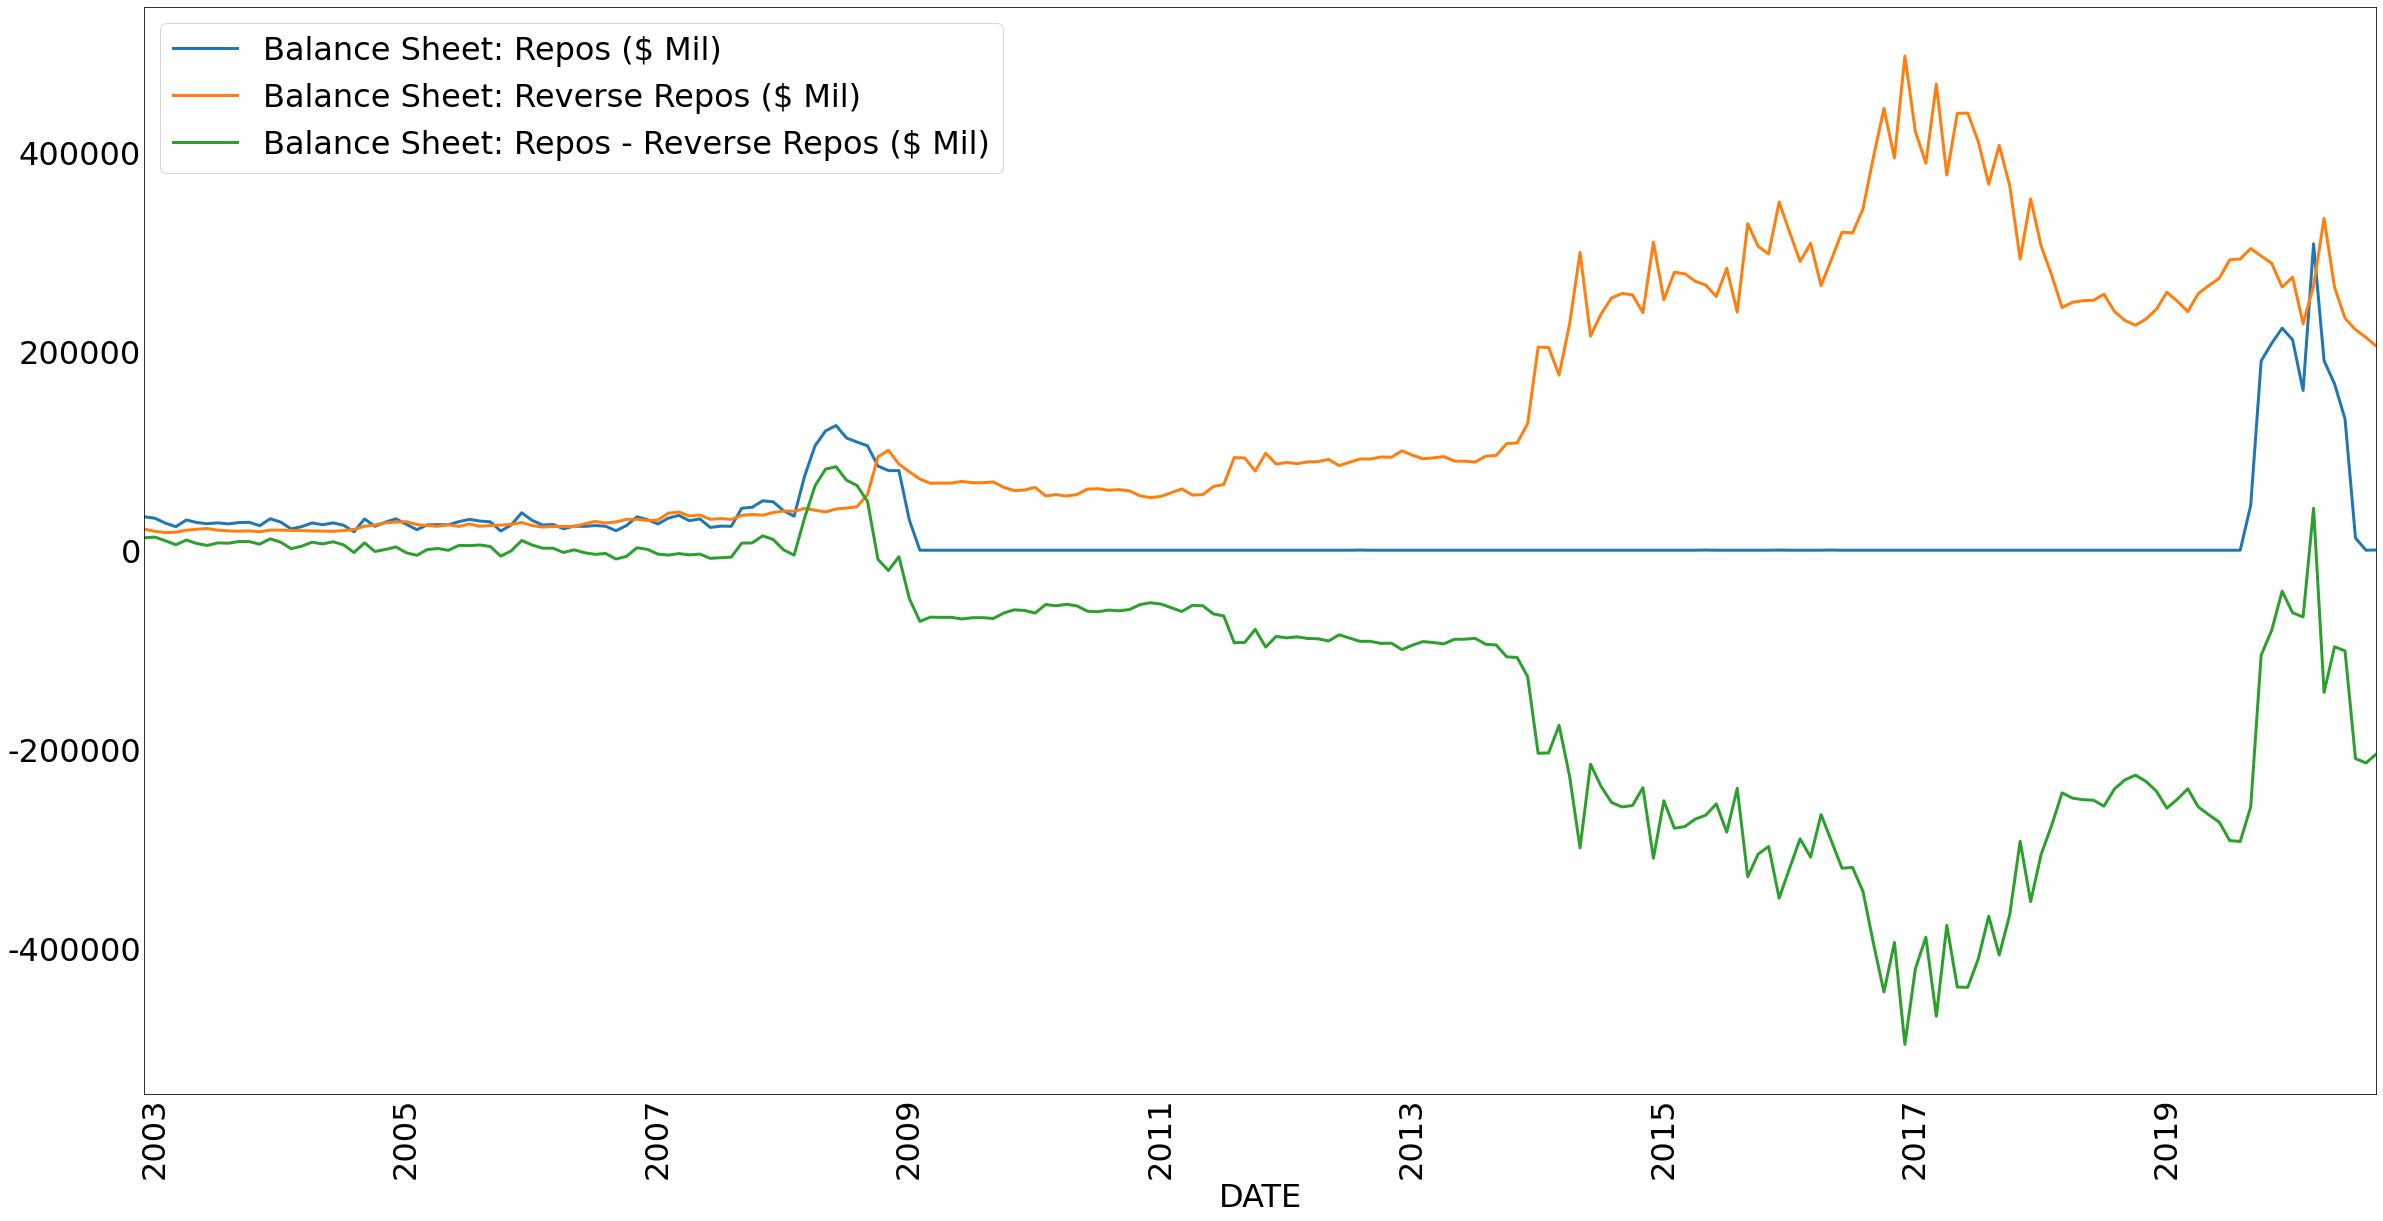

In [27]:
#fedProject.py
# . . . 
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])

overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], linewidth = 3)

The Federal Reserve has been a net borrower in the overnight lending market. Since the value of its reverse repos is greater than the value of its repos, the overall effect of Fed operations in the overnight lending market has been to decrease the quantity of funds available to investors in that market.

## Federal Funds Rate, Interest on Excess Reserves, and Federal Reserve Influence over Interest Rates

The overnight lending market plays a key role in the setting of monetary policy by Federal Reserve. Monetary policy is typically enacted by the setting of interest rate targets. The Federal Reserves does not independently target different interest rates. Rather, it targets one rate and then may attempt to marginally influence other interest rates.

The Fed attempts to influence the risk free rate of interest. Before the financial crisis of 2008, the risk free rate was thought to be the rate paid on short-term sovereign bonds (e.g., U.S. Treasuries). A similar approximation of the risk free rate is provided by the federal funds rate, the rate charged for overnight lending between banks. Except under extraordinary circumstance, as occurred when interbank lending slowed to a near halt in 2008, an overnight loan is expected to be able to be repaid by the borrowing bank without any difficulty. For this reason, the Federal Reserve 1) targets the federal funds rate and 2) attempts to maintain stability in the overnight lending market. We can think of the overnight lending and short-term U.S. Treasuries as near-perfect substitutes.

In 2008, the Federal Reserve add a relevant alternative to these two instruments: deposit accounts that pay interest on excess reserves. Since the Federal Reserve is not at risk of going bankrupt (or it may be more appropriate to say, not in danger dollar devaluation due to fall value of its dollar assets relative to its liabilities), payment of interest on excess reserves is a true risk-free rate for investors, so long as interest rates are believed to compensate for costs from expected future inflation.

For nearly a decade, the Federal Reserve set the rate paid on excess reserves equal to federal funds rate. This made interest bearing deposit accounts at the Fed clearly superior to investment in the overnight lending market. More recently, this rate has moved marginally below the overnight lending rate. The difference between these since mid 2018 has been between 5 and 15 basis points (between .05 and .15).

---

The Fed intervenes in the overnight lending market with the intention of influencing the total expenditures, which includes investment. This policy is guided by the Fed's interest rate target. After 2008, the accomplishment of the Federal funds target is supported by the setting of the rate paid on excess reserves held at the Fed. 

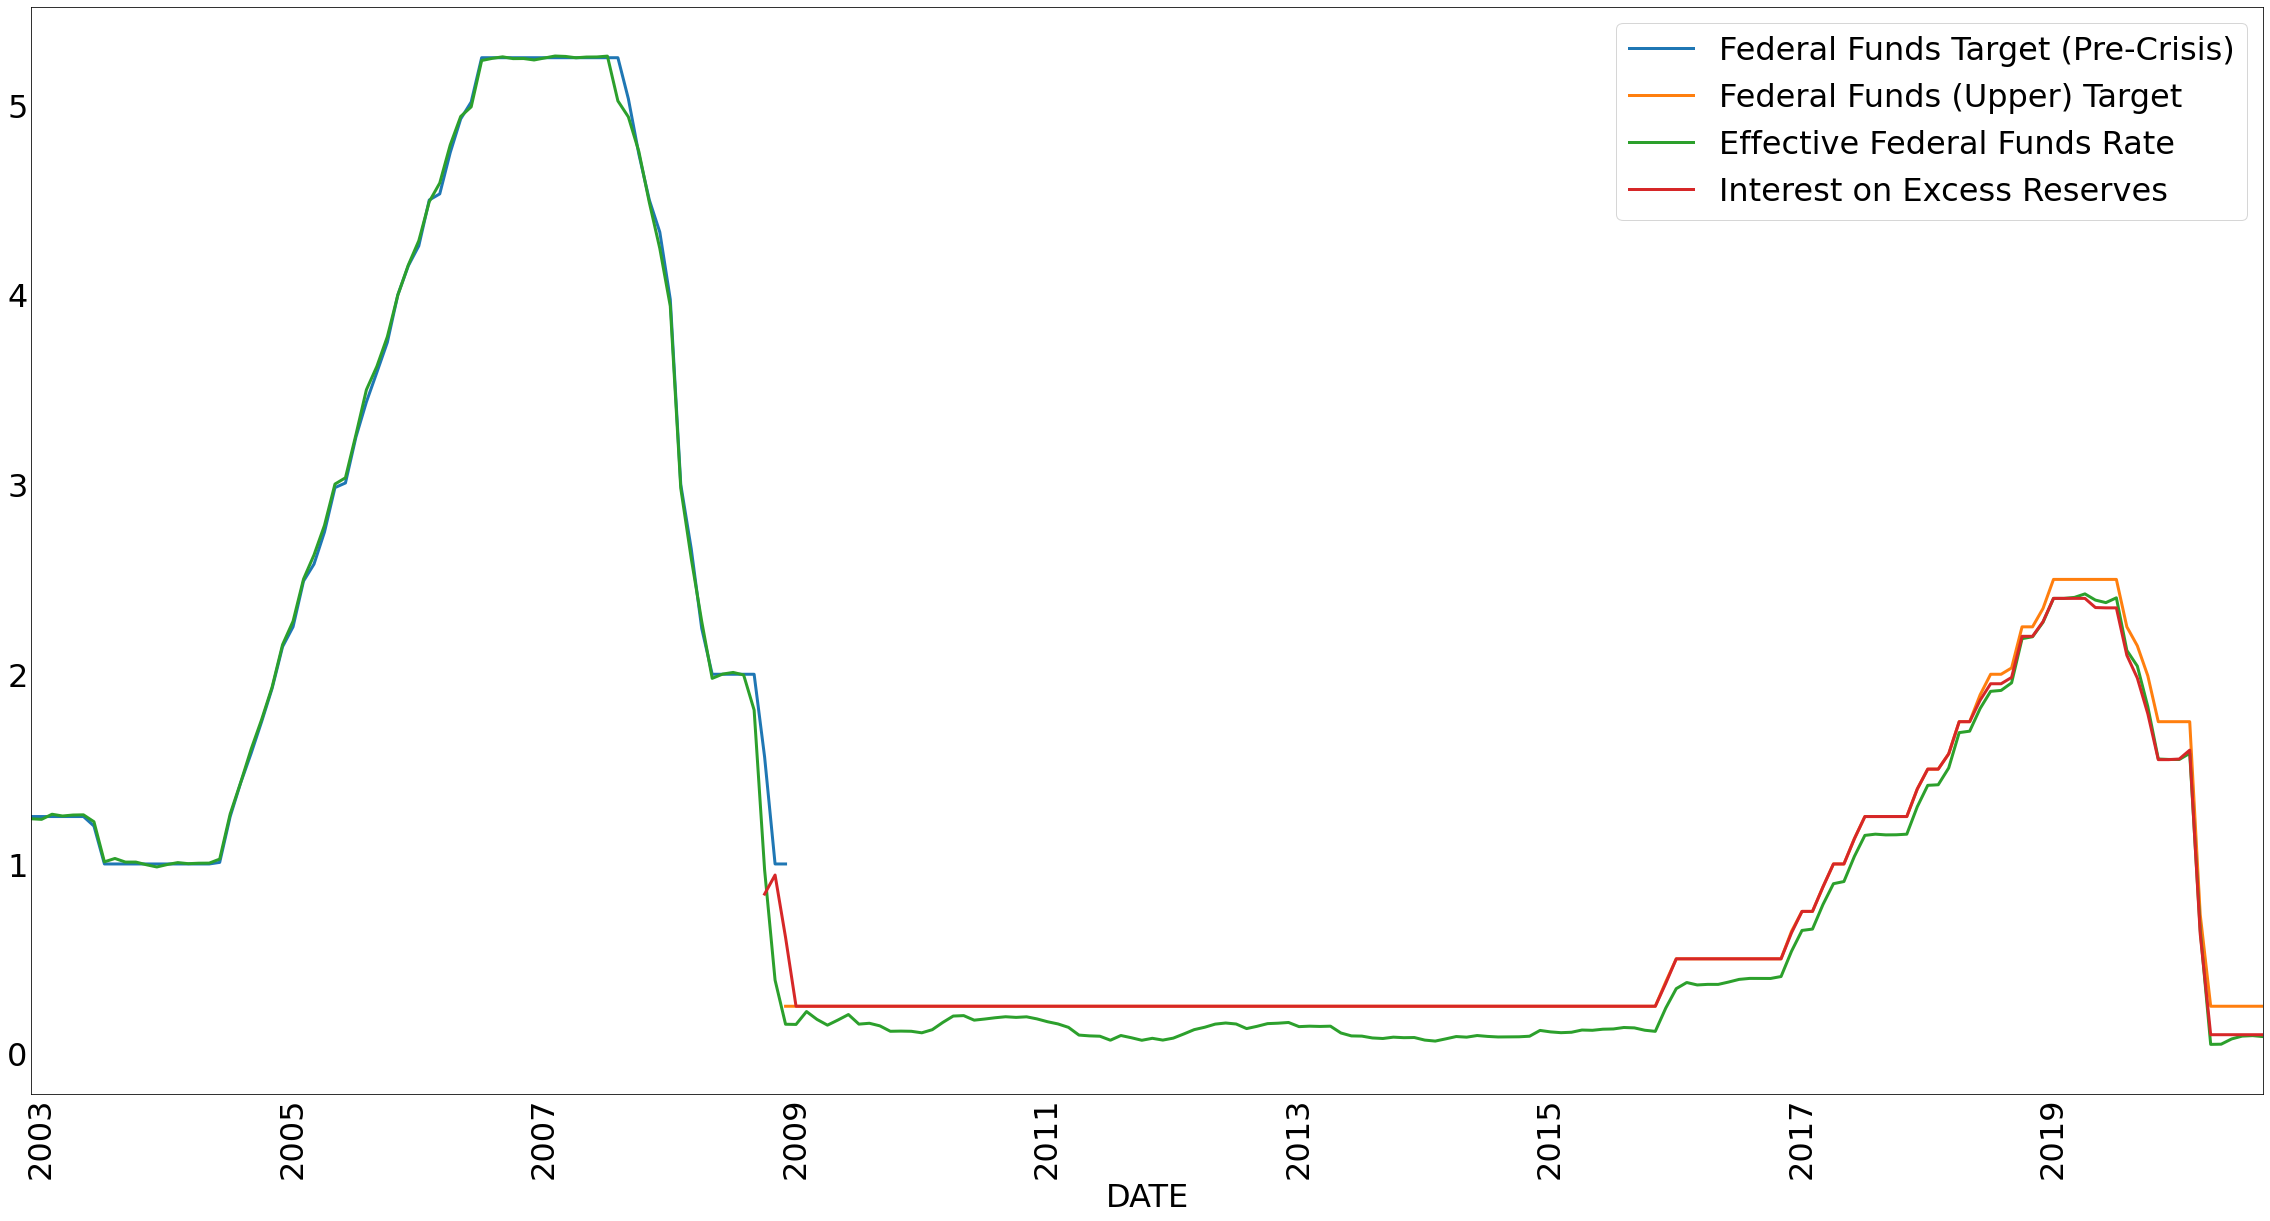

In [28]:
#fedProject.py
# . . . 
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
plot_lines(data[interest_vars], linewidth = 3)

From early 2009 to mid 2018, banks had little incentive to lend overnight to one another since the rate paid on excess reserves was actually higher than the effective federal funds rate. After the Federal Reserve lowered the rate paid on excess reserves relative to the upper federal funds target, the effective federal funds rate has tended to be higher or at least equal to the rate paid on excess reserves. With the onset of the COVID-19 policy response, the federal funds rate briefly moved below the rate paid on excess reserves, but has again returned to equality with it.

**Conclusion**

Having created a script for downloading and visualizing data from the Federal Reserve, you are in a position to better understand how monetary policy works. Before 2008, monetary policy might have been summed up by reference to only a few policy tools:

setting of the discount window (i.e., direct lending by the central bank)
open market operations (i.e., purchases and sales of sovereign debt)
setting of the required reserve ratio
targeting of the federal funds rates
All of these elements still play a role in monetary policy. Now, they interact with a much larger set of strategies and financial instruments and facilities. Most important, the Federal Reserve has begun to manage demand for money in by offering interest bearing deposit accounts.

This lesson has simplified monetary policy, viewing all operations as amounting to:

loans from the central bank to the market
borrowing from the central bank, often in the form of deposit accounts
targeting of interest rates by adjusting rates of interest paid to depositors and through operations in the overnight lending market
Furthermore, the increase in the variety of instruments held by the Federal Reserve has allowed it to target particular markets, namely, the home mortgage market in the U.S.. The expansion of the Federal Reserve's balance sheet has also allowed it to significantly increase its support of Federal borrowing. In the process, its ability and willingness to cooperate with the U.S. Treasury has greatly increased since the policy regime change that occurred starting in 2008.

## Appendix

Returning to the earlier, significant interventions in the mortgage market, we will close by dividing the Fed's assets between:

1. U.S. Treasuries
2. Mortgage Backed Securities
3. Direct Lending to Private and Central Banks
4. Repurchase Agreements
5. Unamortized Security Premiums
6. Everything Else

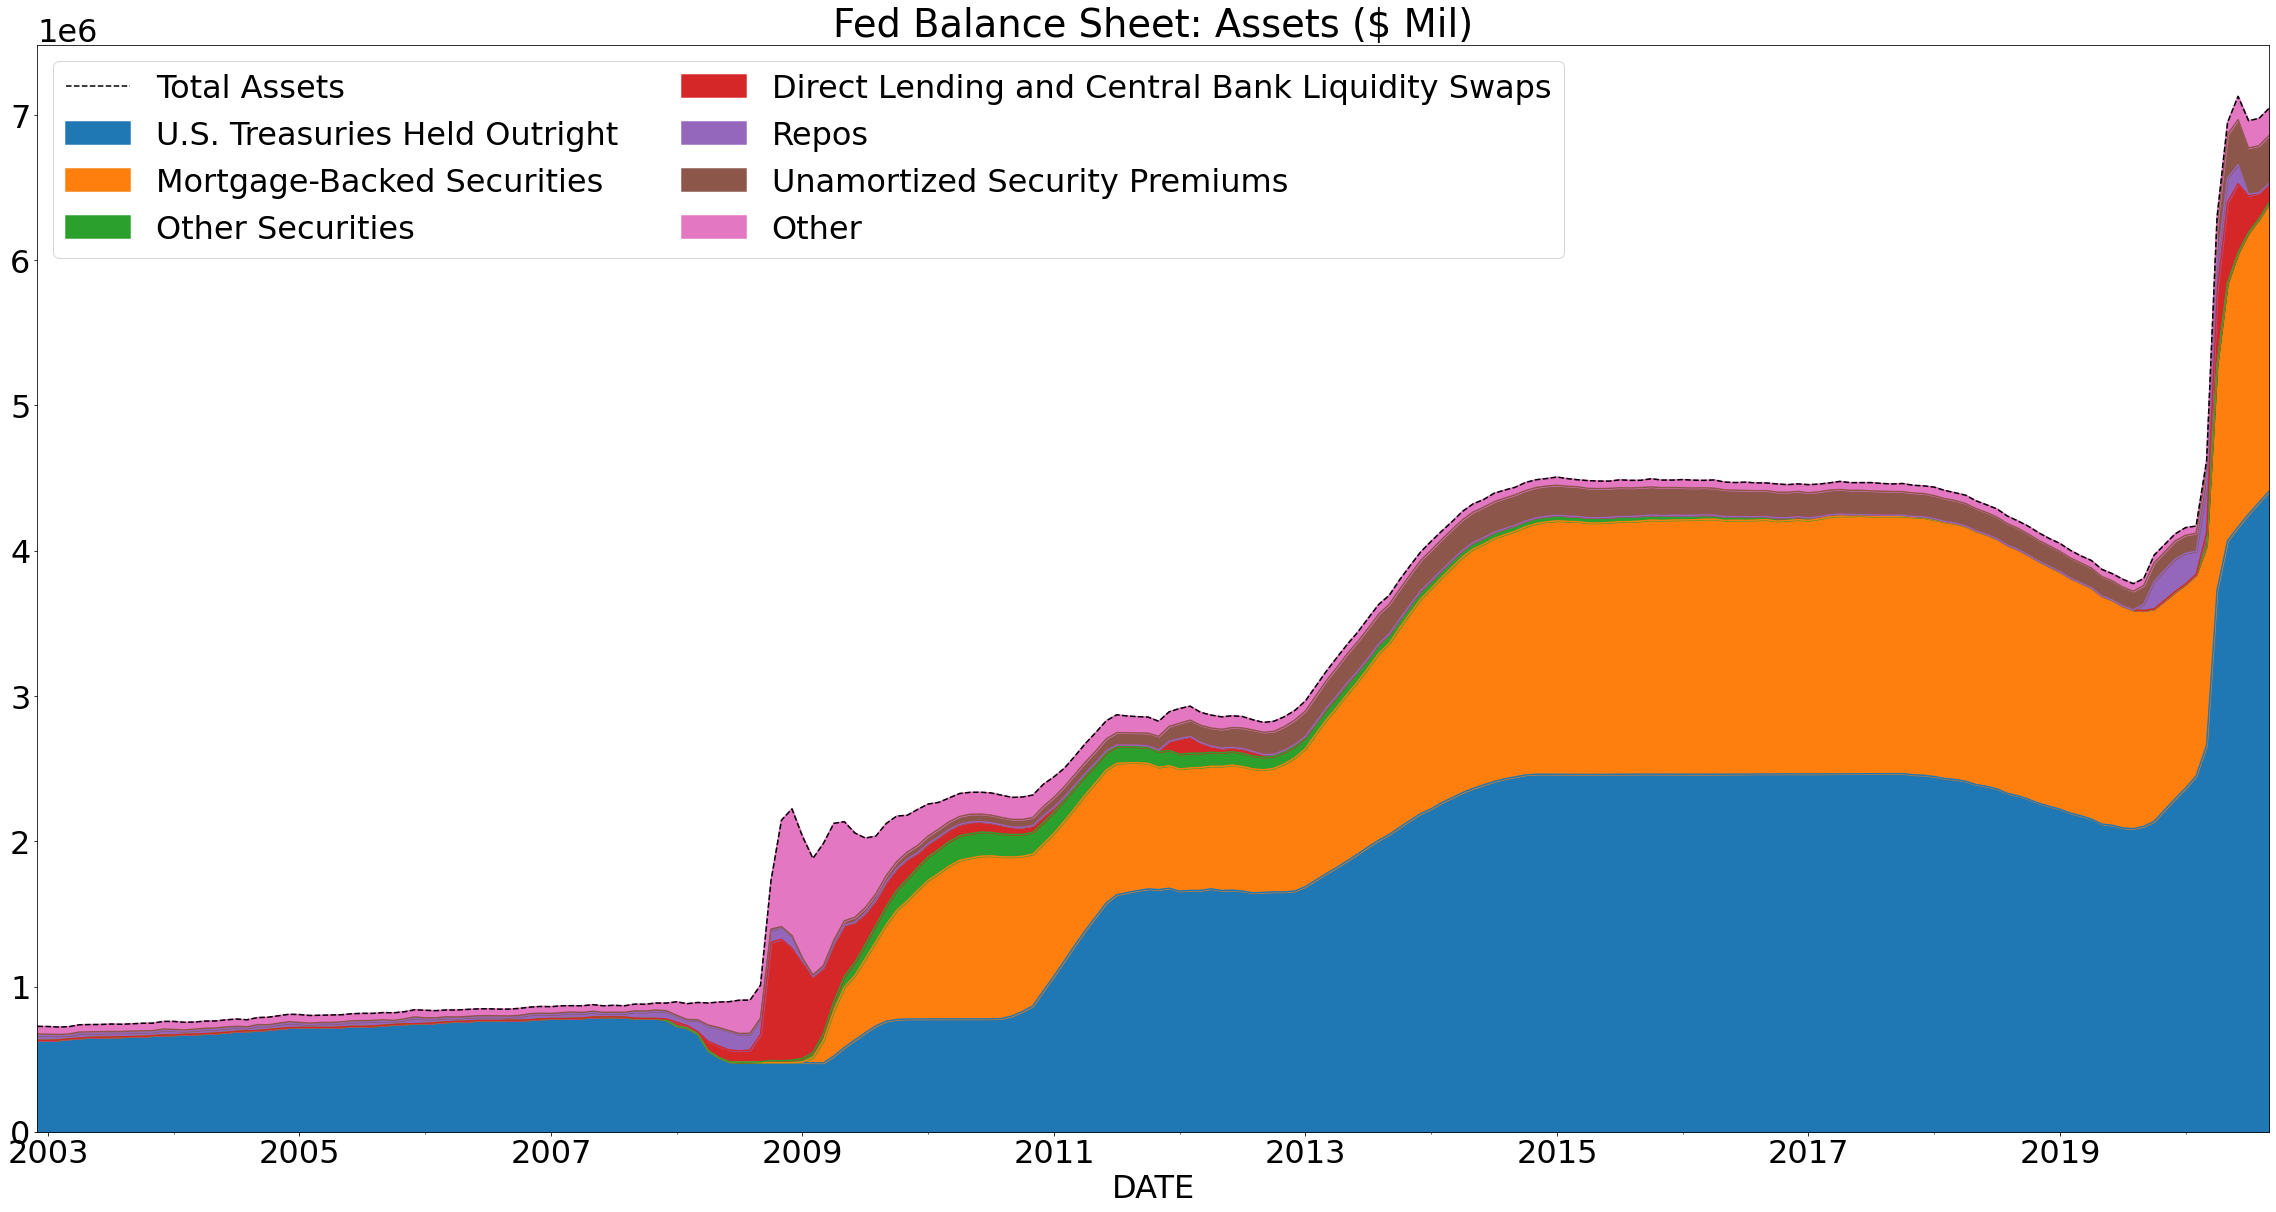

In [31]:
#fedProject
# . . . 
# creating some aggregate categories
data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"] =\
    data["Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"].add(
    data["Balance Sheet: Direct Lending ($ Mil)"])

# add catetories for securities
data["Balance Sheet: Other Securities"] = data["Balance Sheet: Securities Held Outright ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Mortgage-Backed Securities ($ Mil)"])

# everything else, we'll create a cotegory for those called "Other"
data["Balance Sheet: Other"] = data["Balance Sheet: Total Assets ($ Mil)"].sub(
    data["Balance Sheet: Securities Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"]).sub(
    data["Balance Sheet: Repos ($ Mil)"]).sub(
    data["Balance Sheet: Unamortized Security Premiums ($ Mil)"])

account_vars = ["U.S. Treasuries Held Outright",
               "Mortgage-Backed Securities",
               "Other Securities",
               "Direct Lending and Central Bank Liquidity Swaps",
               "Repos",
               "Unamortized Security Premiums",
               "Other"]

# Replace some of the letters in the data by renaming the columns. 
# for every column, replace the column name with the same key but replace Balance sheet with a blank space
# and replacing "$ Mil" with a blacnk space so the result will just be the name of the variables
rename_data = data.rename(columns = {
    key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()})

plot_stacked_lines(rename_data, 
                   account_vars, linewidth = 1.5, total_var = "Total Assets", 
                   title = "Fed Balance Sheet: Assets ($ Mil)")

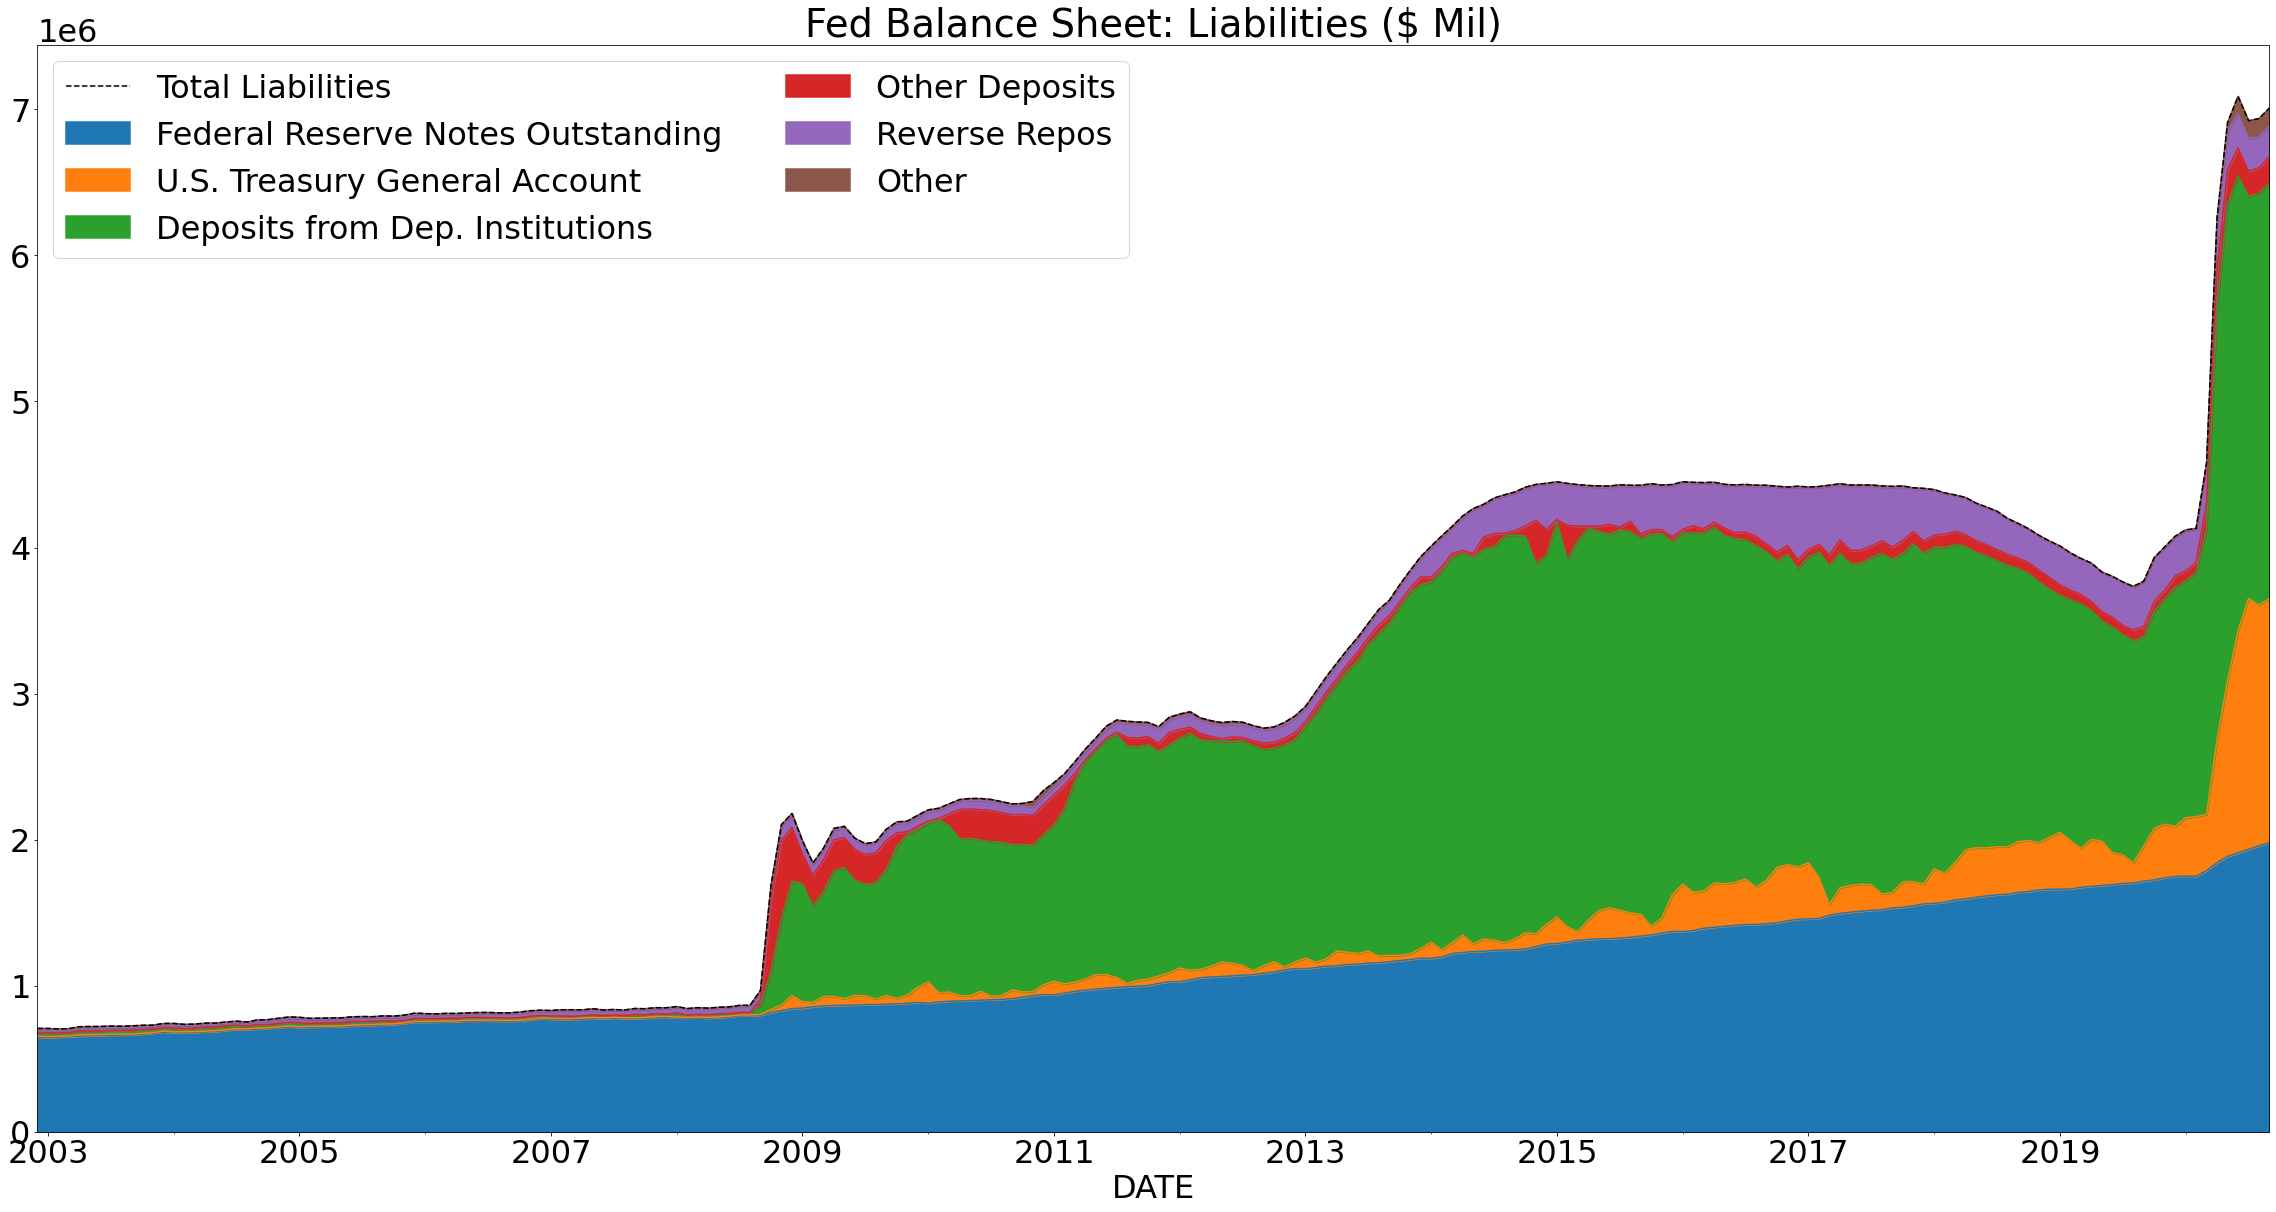

In [32]:
data["Balance Sheet: Other Deposits ($ Mil)"] = data["Balance Sheet: All Deposits ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"])
data["Balance Sheet: Other"]= data["Balance Sheet: Total Liabilities ($ Mil)"].sub(
    data["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)"]).sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"]).sub(
    data["Balance Sheet: Other Deposits ($ Mil)"]).sub(
    data["Balance Sheet: Reverse Repos ($ Mil)"])

account_vars = ["Federal Reserve Notes Outstanding",
                "U.S. Treasury General Account",
                "Deposits from Dep. Institutions",
                "Other Deposits",
                "Reverse Repos",
                "Other"]

plot_stacked_lines(
    data.rename(columns = {key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()}),
    account_vars, linewidth = 1.5, total_var = "Total Liabilities", title = "Fed Balance Sheet: Liabilities ($ Mil)")